# Predicting Churn of Telecommunication Customers

## Introduction
The goal of the Telecom Churn Project is to develop a model that will be able to forecast if the clients are planning to leave. Interconnect's goal is to learn if their client's are going to churn so they can offer them special deals, in hopes of getting them to stay. 

In [2]:
#import os, json, hashlib
#import pandas as pd, numpy as np, joblib
#from datetime import datetime

# Build a sparse preprocessor (OneHotEncoder with sparse_output=True)
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer

#import os, pandas as pd, joblib, json, sys

#import os
#import warnings
#import pandas as pd
#import numpy as np
#from sklearn.feature_selection import mutual_info_classif
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import roc_auc_score, average_precision_score
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#import os, pandas as pd, numpy as np, joblib

#from sklearn.model_selection import StratifiedKFold, cross_val_score
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.inspection import permutation_importance
#from sklearn.model_selection import cross_val_predict

#from sklearn.model_selection import StratifiedKFold, cross_val_predict

#import matplotlib.pyplot as plt
#import seaborn as sns
#from scipy.stats import mannwhitneyu, chi2_contingency
#import joblib

#import os, json, joblib, pandas as pd

#import os, json, joblib, warnings
#import pandas as pd, numpy as np

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

#import pandas as pd, numpy as np, joblib, os, json

#import os, json, joblib
#from sklearn.metrics import make_scorer, roc_auc_score

#import joblib, json, os, pandas as pd, numpy as np
#import joblib, json, os, pandas as pd
#import shutil, os, pandas as pd, numpy as np
#import os, shutil, pandas as pd, numpy as np, joblib, json

#from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score

#import os, json, joblib, traceback
#from sklearn.model_selection import cross_val_score, StratifiedKFold

#import os, joblib, json, numpy as np, warnings
#import os, json, joblib, numpy as np, pandas as pd

#import joblib, pandas as pd, numpy as np, os, matplotlib.pyplot as plt

#import pandas as pd, numpy as np, os, joblib, json
#import os, json, pandas as pd, numpy as np

#import os, json, joblib, shutil, warnings

#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_auc_score

#import os, json, joblib, shutil
#from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, precision_recall_curve
#import os, json, joblib, pandas as pd, numpy as np
#from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
import os
import json
import shutil
import traceback
import hashlib
from datetime import datetime

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import mannwhitneyu, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict,
    RandomizedSearchCV
)

from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    average_precision_score,
    make_scorer
)

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

try:
    from lightgbm import LGBMClassifier
except Exception:
    LGBMClassifier = None

**Load data and perform checks of data to ensure proper transfer/upload**

In [4]:
!ls -la *.ipynb || true

-rw-r--r--. 1 student student 578820 Nov  9 02:53 notebook.ipynb
-rw-r--r--. 1 student student  31781 Nov  9 02:53 notebook1.ipynb


In [5]:
!jupyter nbconvert --to script notebook1.ipynb
# show generated file
!ls -la notebook1.py
# inspect top of to spot heavy training code
!sed -n '1,160p' notebook1.py

[NbConvertApp] Converting notebook notebook1.ipynb to script
[NbConvertApp] Writing 13410 bytes to notebook1.py
-rw-r--r--. 1 student student 13410 Nov  9 02:54 notebook1.py
#!/usr/bin/env python
# coding: utf-8

# **Initial Data Download**

# In[14]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn
from datetime import datetime
import joblib

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# In[15]:


# Paths
contract_path = "contract.csv"
personal_path = "personal.csv"
internet_path = "internet.csv"
phone_path = "phone.csv"


# In[16]:


# Load
contract = pd.read_csv(contract_path)
personal = pd.read_csv(personal_path)
internet = pd.read_csv(internet_path)
phone = pd.read_csv(phone_path)


# **Preprocessing**

# In[17]:


# Configuration
# Config
SNAPSHOT = pd.to_datetime(

In [6]:
# Run in new notebook
import pandas as pd, joblib, os
if os.path.exists("data/processed/merged_clean.csv"):
    df = pd.read_csv("data/processed/merged_clean.csv", parse_dates=["BeginDate","EndDate_parsed"], low_memory=False)
    preproc = joblib.load("models/preprocessor_template.joblib") if os.path.exists("models/preprocessor_template.joblib") else None

In [7]:
# show processed data and models folders
!ls -la data/processed || true
!ls -la models || true

# also show the top-level files to see the notebook(s) and raw CSVs
!ls -la

total 69404
drwxr-xr-x. 4 student student    6144 Nov  9 02:32 .
drwxr-xr-x. 5 student student    6144 Nov  6 23:40 ..
drwxr-xr-x. 2 student student    6144 Nov  9 00:54 .ipynb_checkpoints
-rw-r--r--. 1 student student     866 Nov  9 01:17 artifact_manifest.json
-rw-r--r--. 1 student student    1310 Nov  9 01:17 categorical_eda_summary.csv
-rw-r--r--. 1 student student     253 Nov  9 01:19 chosen_threshold.json
drwxr-xr-x. 2 student student    6144 Nov  5 23:29 eda
-rw-r--r--. 1 student student    1250 Nov  9 01:17 feature_mi.csv
-rw-r--r--. 1 student student    3377 Nov  9 01:17 feature_summary_combined.csv
-rw-r--r--. 1 student student    2390 Nov  9 01:17 feature_univariate_auc.csv
-rw-r--r--. 1 student student  688917 Nov  9 01:19 final_pipeline.joblib
-rw-r--r--. 1 student student  691989 Nov  9 01:19 final_pipeline.joblib.bak
-rw-r--r--. 1 student student 1350163 Nov  9 02:53 merged_clean.csv
-rw-r--r--. 1 student student 2585773 Nov  9 02:53 merged_clean_df.joblib
-rw-r--r--. 1 

In [8]:
# Confirm the cleaned CSV loads and show basic info
print("exists merged_clean:", os.path.exists("data/processed/merged_clean.csv"))
df = pd.read_csv("data/processed/merged_clean.csv", low_memory=False, parse_dates=["BeginDate","EndDate_parsed"])
print("shape:", df.shape)
print("columns:", df.columns.tolist())
display(df.head())

exists merged_clean: True
shape: (7043, 43)
columns: ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_raw', 'EndDate_parsed', 'tenure_months_snapshot', 'tenure_months_until_end', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'num_internet_services', 'has_internet', 'has_phone', 'num_services', 'avg_monthly_from_total', 'payment_auto', 'churn_left', 'active_at_snapshot', 'target']


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_raw,EndDate_parsed,...,Dependents_bin,num_internet_services,has_internet,has_phone,num_services,avg_monthly_from_total,payment_auto,churn_left,active_at_snapshot,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaT,...,0,1,1,0,1,29.264706,0,0,1,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,NaT,...,0,2,1,0,2,55.524537,0,0,1,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01 00:00:00,2019-12-01,...,0,2,1,0,2,26.769802,0,1,0,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaT,...,0,3,1,0,3,40.869227,1,0,1,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01 00:00:00,2019-11-01,...,0,0,1,0,0,30.149105,0,1,0,0


In [9]:
# Sanity checks (unique customers, duplicates, data types)
print("unique customerIDs:", df["customerID"].nunique())
print("rows:", len(df))
print("duplicate customerID rows:", df["customerID"].duplicated().sum())
print("\nDtypes:\n", df.dtypes)

unique customerIDs: 7043
rows: 7043
duplicate customerID rows: 0

Dtypes:
 customerID                         object
BeginDate                  datetime64[ns]
EndDate                            object
Type                               object
PaperlessBilling                   object
PaymentMethod                      object
MonthlyCharges                    float64
TotalCharges                      float64
EndDate_raw                        object
EndDate_parsed             datetime64[ns]
tenure_months_snapshot            float64
tenure_months_until_end           float64
gender                             object
SeniorCitizen                       int64
Partner                            object
Dependents                         object
InternetService                    object
OnlineSecurity                     object
OnlineBackup                       object
DeviceProtection                   object
TechSupport                        object
StreamingTV                        object
S

In [10]:
# Target and class balance
for col in ("target","active_at_snapshot","churn_left"):
    if col in df.columns:
        print(f"\n{col} counts:")
        print(df[col].value_counts(dropna=False))
        print(df[col].value_counts(normalize=True))


target counts:
1    5174
0    1869
Name: target, dtype: int64
1    0.73463
0    0.26537
Name: target, dtype: float64

active_at_snapshot counts:
1    5174
0    1869
Name: active_at_snapshot, dtype: int64
1    0.73463
0    0.26537
Name: active_at_snapshot, dtype: float64

churn_left counts:
0    5174
1    1869
Name: churn_left, dtype: int64
0    0.73463
1    0.26537
Name: churn_left, dtype: float64


In [11]:
# Numeric summaries & TotalCharges imputation check
num_cols = [c for c in ["MonthlyCharges","TotalCharges","tenure_months_snapshot","avg_monthly_from_total"] if c in df.columns]
print(df[num_cols].describe().T)
print("\nTotalCharges missing count:", df["TotalCharges"].isna().sum() if "TotalCharges" in df.columns else "no TotalCharges")

                         count         mean          std       min        25%  \
MonthlyCharges          7043.0    64.761692    30.090047  18.25000   35.50000   
TotalCharges            7043.0  2279.734304  2266.794470   0.00000  398.55000   
tenure_months_snapshot  7043.0    33.063662    24.198517   0.00000   10.05000   
avg_monthly_from_total  7043.0    59.504358    30.861155   3.88668   25.53411   

                                50%          75%          max  
MonthlyCharges            70.350000    89.850000   118.750000  
TotalCharges            1394.550000  3786.600000  8684.800000  
tenure_months_snapshot    29.010000    56.040000    76.020000  
avg_monthly_from_total    61.645433    85.311452   120.729389  

TotalCharges missing count: 0


In [12]:
# Check for future-leakage columns present
for bad in ("EndDate_parsed","EndDate_raw","tenure_months_until_end"):
    print(bad, "present ->", bad in df.columns)

EndDate_parsed present -> True
EndDate_raw present -> True
tenure_months_until_end present -> True


In [13]:
# Load the preprocessor template to inspect transformer lists
preproc_path = "models/preprocessor_template.joblib"
if os.path.exists(preproc_path):
    preproc = joblib.load(preproc_path)
    print("Loaded preprocessor:", preproc)
else:
    print("No preprocessor_template.joblib found")

Loaded preprocessor: ColumnTransformer(sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MonthlyCharges', 'TotalCharges',
                                  'tenure_months_snapshot',
                                  'num_internet_services', 'num_services',
                                  'avg_monthly_from_total', 'SeniorCitizen']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEn

**Tighten up final Preprocessing before EDA**

In [14]:
# coerce dtypes, drop leakage, create sparse preprocessor, write manifest + requirements
# Config
RAW_DIR = "data/raw"
PROC_DIR = "data/processed"
MODELS_DIR = "models"
CLEAN_CSV = os.path.join(PROC_DIR, "merged_clean.csv")
CLEAN_JOBLIB = os.path.join(PROC_DIR, "merged_clean_df.joblib")
PREPROC_PATH = os.path.join(MODELS_DIR, "preprocessor_template.joblib")
PREPROC_SPARSE = os.path.join(MODELS_DIR, "preprocessor_sparse_template.joblib")
SNAPSHOT_PREFIX = os.path.join(PROC_DIR, "merged_raw_snapshot")   # existing snapshot already saved earlier
SEED = 42

# helper md5
def md5(fp):
    h = hashlib.md5()
    with open(fp, "rb") as f:
        for chunk in iter(lambda: f.read(8192), b""):
            h.update(chunk)
    return h.hexdigest()

# Load cleaned csv artifact
if not os.path.exists(CLEAN_CSV):
    raise FileNotFoundError(f"{CLEAN_CSV} not found. Please ensure merged_clean.csv exists in {PROC_DIR}.")
df = pd.read_csv(CLEAN_CSV, parse_dates=["BeginDate","EndDate_parsed"], low_memory=False)
print("Loaded cleaned CSV:", CLEAN_CSV, "shape:", df.shape)

# Coerce safe types: IDs, numeric columns, binary *_bin -> Int64
df["customerID"] = df["customerID"].astype(str)

# convert numeric columns defensively
for c in ["MonthlyCharges","TotalCharges","tenure_months_snapshot","avg_monthly_from_total","SeniorCitizen"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# force *_bin to nullable Int64 to avoid float 0.0/1.0 confusion
bin_cols = [c for c in df.columns if c.endswith("_bin")]
for c in bin_cols:
    try:
        df[c] = df[c].astype("Int64")
    except Exception:
        # fallback: coerce truthy values to 1, otherwise 0 or <NA>
        df[c] = pd.Series([1 if str(v).strip().lower() in ("yes","y","true","1") else (0 if str(v).strip().lower() in ("no","n","false","0","no internet service","no phone service") else pd.NA) for v in df[c]], dtype="Int64")

# ensure some other flags are integer-like
for c in ("has_internet","has_phone","num_internet_services","num_services","payment_auto"):
    if c in df.columns:
        if pd.api.types.is_float_dtype(df[c]) and (df[c].dropna() % 1 == 0).all():
            df[c] = df[c].astype("Int64")
        else:
            # safe fill and convert
            df[c] = df[c].fillna(0).astype(int)

# Save a timestamped snapshot (keep traceability) then drop leakage cols
ts = datetime.utcnow().strftime("%Y%m%dT%H%M%SZ")
snapshot_fp = os.path.join(PROC_DIR, f"merged_raw_snapshot_{ts}.csv")
df.to_csv(snapshot_fp, index=False)
print("Saved snapshot of cleaned (pre-drop) to:", snapshot_fp)

leakage_cols = ["EndDate_parsed","EndDate_raw","EndDate","tenure_months_until_end"]
present_leak = [c for c in leakage_cols if c in df.columns]
print("Leakage columns present before drop:", present_leak)

for c in leakage_cols:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

# Quick asserts
assert "customerID" in df.columns, "customerID missing"
assert df["customerID"].nunique() == len(df), "duplicate customerID rows found"
print("Asserts OK: unique customerIDs =", df["customerID"].nunique())

# Overwrite cleaned artifacts with tightened df
os.makedirs(PROC_DIR, exist_ok=True)
df.to_csv(CLEAN_CSV, index=False)
joblib.dump(df, CLEAN_JOBLIB)
print("Wrote tightened cleaned CSV and joblib:", CLEAN_CSV, CLEAN_JOBLIB)

# Load ooriginal preprocessor template and create sparse variant
if os.path.exists(PREPROC_PATH):
    preproc = joblib.load(PREPROC_PATH)
    print("Loaded preprocessor template:", PREPROC_PATH)
    # extract expected numeric and categorical column lists
    expected_num, expected_cat = [], []
    try:
        for name, trans, cols in preproc.transformers:
            if name == "num":
                expected_num = list(cols)
            elif name == "cat":
                expected_cat = list(cols)
    except Exception:
        # If structure differs, fallback to selecting from df
        expected_num = [c for c in df.select_dtypes(include=["number"]).columns.tolist()]
        expected_cat = [c for c in df.select_dtypes(include=["object","category"]).columns.tolist()]

    numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
    try:
        # sklearn >=1.2: sparse_output arg
        cat_ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    except TypeError:
        # fallback older sklearn
        cat_ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

    cat_transformer = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="missing")), ("ohe", cat_ohe)])
    preproc_sparse = ColumnTransformer([("num", numeric_transformer, expected_num), ("cat", cat_transformer, expected_cat)], remainder="drop")
    joblib.dump(preproc_sparse, PREPROC_SPARSE)
    print("Saved sparse preprocessor template to:", PREPROC_SPARSE)
else:
    print("No preprocessor_template.joblib found at", PREPROC_PATH, " — skip preproc save.")

# Write an artifact manifest for reproducibility
manifest = {}
for fp in [CLEAN_CSV, CLEAN_JOBLIB, PREPROC_PATH, PREPROC_SPARSE, snapshot_fp]:
    if fp and os.path.exists(fp):
        manifest[os.path.basename(fp)] = {"path": fp, "size": os.path.getsize(fp), "md5": md5(fp)}
manifest["created_at_utc"] = datetime.utcnow().isoformat()
with open(os.path.join(PROC_DIR, "artifact_manifest.json"), "w") as f:
    json.dump(manifest, f, indent=2)
print("Wrote artifact_manifest.json with entries:", list(manifest.keys()))

# Save current pip freeze 
try:
    import subprocess
    req_fp = "requirements.txt"
    subprocess.run(["/bin/sh", "-c", "pip freeze > requirements.txt"], check=False)
    if os.path.exists(req_fp):
        print("Saved requirements.txt")
except Exception as e:
    print("Could not save requirements.txt:", e)

print("Final tightening complete.")

Loaded cleaned CSV: data/processed/merged_clean.csv shape: (7043, 43)
Saved snapshot of cleaned (pre-drop) to: data/processed/merged_raw_snapshot_20251109T025403Z.csv
Leakage columns present before drop: ['EndDate_parsed', 'EndDate_raw', 'EndDate', 'tenure_months_until_end']
Asserts OK: unique customerIDs = 7043
Wrote tightened cleaned CSV and joblib: data/processed/merged_clean.csv data/processed/merged_clean_df.joblib
Loaded preprocessor template: models/preprocessor_template.joblib
Saved sparse preprocessor template to: models/preprocessor_sparse_template.joblib
Wrote artifact_manifest.json with entries: ['merged_clean.csv', 'merged_clean_df.joblib', 'preprocessor_template.joblib', 'preprocessor_sparse_template.joblib', 'merged_raw_snapshot_20251109T025403Z.csv', 'created_at_utc']
Saved requirements.txt
Final tightening complete.


**Exploratory Data Analysis**

In [15]:
# Quick pre-EDA verification + create EDA working copy (non-destructive)
PROC_DIR = "data/processed"
MASTER_FP = os.path.join(PROC_DIR, "merged_clean.csv")
EDA_FP = os.path.join(PROC_DIR, "merged_clean_eda.csv")
PREPROC_FP = "models/preprocessor_sparse_template.joblib"
SNAPSHOT_FILES = [f for f in os.listdir(PROC_DIR) if "merged_raw_snapshot" in f]

assert os.path.exists(MASTER_FP), f"Master cleaned file not found at {MASTER_FP}"

df = pd.read_csv(MASTER_FP, parse_dates=["BeginDate"], low_memory=False)
print("Loaded master:", MASTER_FP, "shape:", df.shape)

# basic checks
print("leakage present:", [c for c in ["EndDate_parsed","EndDate_raw","EndDate","tenure_months_until_end"] if c in df.columns])
print("customerID unique:", df["customerID"].nunique(), "/", len(df))
print("target churn_left dtype/counts:", df["churn_left"].dtype, df["churn_left"].value_counts(dropna=False).to_dict())
print("preprocessor_sparse exists:", os.path.exists(PREPROC_FP))
print("snapshot files:", SNAPSHOT_FILES[:5])

# Create EDA working copy (safe, idempotent)
if not os.path.exists(EDA_FP):
    df_eda = df.copy()
    # Map service NAs to explicit category (EDA-only)
    if "InternetService" in df_eda.columns:
        df_eda["internet_service_missing"] = df_eda["InternetService"].isna().astype(int)
        df_eda["InternetService"] = df_eda["InternetService"].fillna("No internet service")
    if "MultipleLines" in df_eda.columns:
        df_eda["multiplelines_missing"] = df_eda["MultipleLines"].isna().astype(int)
        df_eda["MultipleLines"] = df_eda["MultipleLines"].fillna("No phone service")
    # Ensure *_bin are integer-typed for summaries
    for c in [c for c in df_eda.columns if c.endswith("_bin")]:
        try:
            df_eda[c] = df_eda[c].astype("Int64")
        except Exception:
            df_eda[c] = pd.to_numeric(df_eda[c], errors="coerce").fillna(0).astype("Int64")
    # temporary tenure bins for plotting (EDA only)
    if "tenure_months_snapshot" in df_eda.columns:
        bins = [-1, 3, 12, 36, 72, 10000]
        labels = ["very_short","short","medium","long","very_long"]
        df_eda["tenure_bin"] = pd.cut(df_eda["tenure_months_snapshot"].fillna(-1), bins=bins, labels=labels)
    df_eda.to_csv(EDA_FP, index=False)
    joblib.dump(df_eda, os.path.join(PROC_DIR, "merged_clean_eda_df.joblib"))
    print("Created EDA working copy:", EDA_FP)
else:
    print("EDA working copy already exists:", EDA_FP)

Loaded master: data/processed/merged_clean.csv shape: (7043, 39)
leakage present: []
customerID unique: 7043 / 7043
target churn_left dtype/counts: int64 {0: 5174, 1: 1869}
preprocessor_sparse exists: True
snapshot files: ['merged_raw_snapshot_20251106T201540Z.csv', 'merged_raw_snapshot_20251107T010046Z.csv', 'merged_raw_snapshot_20251108T231301Z.csv', 'merged_raw_snapshot_20251108T223821Z.csv', 'merged_raw_snapshot_20251107T014545Z.csv']
EDA working copy already exists: data/processed/merged_clean_eda.csv


Loaded EDA file: data/processed/merged_clean_eda.csv shape: (7043, 42)

Target distribution (churn_left = 1):
0    5174
1    1869
Name: churn_left, dtype: int64

Target proportions:
0    0.735
1    0.265
Name: churn_left, dtype: float64


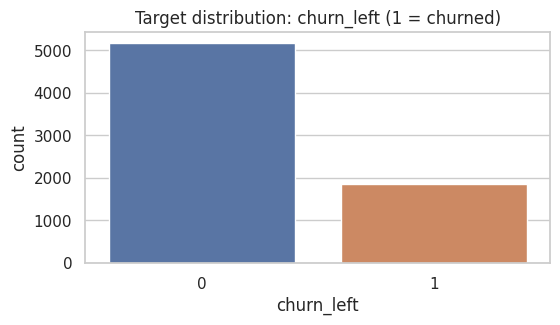


Top counts for PaymentMethod:


,count
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



Top counts for InternetService:


,count
Fiber optic,3096
DSL,2421
No internet service,1526



Top counts for PaperlessBilling:


,count
Yes,4171
No,2872



Top counts for Type:


,count
Month-to-month,3875
Two year,1695
One year,1473



Top counts for MultipleLines:


,count
No,3390
Yes,2971
No phone service,682


In [16]:
# Step 1: visual overview & top categorical counts 
PROC_DIR = "data/processed"
EDA_FP = os.path.join(PROC_DIR, "merged_clean_eda.csv")
df_eda = pd.read_csv(EDA_FP, parse_dates=["BeginDate"], low_memory=False)

print("Loaded EDA file:", EDA_FP, "shape:", df_eda.shape)
print("\nTarget distribution (churn_left = 1):")
print(df_eda["churn_left"].value_counts(dropna=False))
print("\nTarget proportions:")
print(df_eda["churn_left"].value_counts(normalize=True).round(3))

# Target distribution plot
sns.set(style="whitegrid")
plt.figure(figsize=(6,3))
sns.countplot(x=df_eda["churn_left"])
plt.title("Target distribution: churn_left (1 = churned)")
plt.show()

# Top counts for important categoricals 
for c in ["Contract","PaymentMethod","InternetService","PaperlessBilling","Type","MultipleLines"]:
    if c in df_eda.columns:
        print(f"\nTop counts for {c}:")
        display(df_eda[c].value_counts(dropna=False).head(12).to_frame(name="count"))

Columns with missing values (top):


,missing,pct_missing
OnlineSecurity_bin,1526,21.67
StreamingMovies_bin,1526,21.67
TechSupport_bin,1526,21.67
DeviceProtection_bin,1526,21.67
OnlineBackup_bin,1526,21.67
StreamingMovies,1526,21.67
StreamingTV,1526,21.67
TechSupport,1526,21.67
DeviceProtection,1526,21.67
OnlineBackup,1526,21.67



Top missing cols (count): ['OnlineSecurity_bin', 'StreamingMovies_bin', 'TechSupport_bin', 'DeviceProtection_bin', 'OnlineBackup_bin', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingTV_bin']


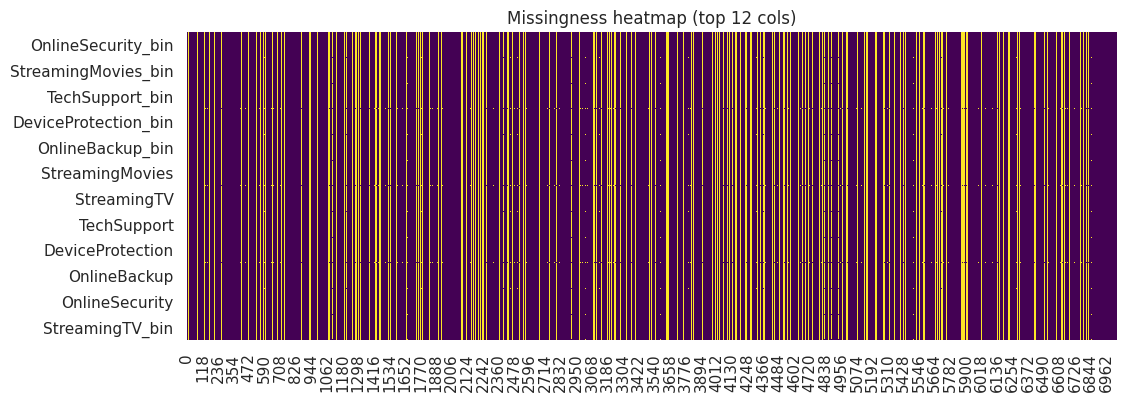


InternetService value counts:


,count
Fiber optic,3096
DSL,2421
No internet service,1526


Churn rate for rows with InternetService == 'No internet service':
count    1526.00000
mean        0.07405
Name: churn_left, dtype: float64

MultipleLines value counts:


,count
No,3390
Yes,2971
No phone service,682


Churn rate for rows with MultipleLines == 'No phone service':
count    682.000000
mean       0.249267
Name: churn_left, dtype: float64

Rows with any NA (count): 1526


In [17]:
# Step 2: missingness summary + heatmap 
PROC_DIR = "data/processed"
EDA_FP = os.path.join(PROC_DIR, "merged_clean_eda.csv")
df_eda = pd.read_csv(EDA_FP, parse_dates=["BeginDate"], low_memory=False)

# missingness summary
miss = df_eda.isna().sum().sort_values(ascending=False)
miss_pct = (miss / len(df_eda) * 100).round(2)
missing_df = pd.DataFrame({"missing": miss, "pct_missing": miss_pct})
print("Columns with missing values (top):")
display(missing_df[missing_df["missing"]>0].head(60))

# show top columns by missingness
top_miss = missing_df[missing_df["missing"]>0].head(30).index.tolist()
print("\nTop missing cols (count):", top_miss)

# plot heatmap for top missing cols (if any)
if len(top_miss) > 0:
    cols_for_heat = top_miss[:30]
    plt.figure(figsize=(12, max(4, 0.2 * len(cols_for_heat))))
    sns.heatmap(df_eda[cols_for_heat].isna().T, cbar=False, cmap="viridis")
    plt.title(f"Missingness heatmap (top {len(cols_for_heat)} cols)")
    plt.yticks(rotation=0)
    plt.show()
else:
    print("No missing values found in df_eda.")

# Check explicit 'No internet service' / 'No phone service' categories and churn rates
if "InternetService" in df_eda.columns:
    print("\nInternetService value counts:")
    display(df_eda["InternetService"].value_counts(dropna=False).to_frame("count"))
    # churn rate for 'No internet service'
    if "No internet service" in df_eda["InternetService"].unique():
        print("Churn rate for rows with InternetService == 'No internet service':")
        print(df_eda.loc[df_eda["InternetService"]=="No internet service","churn_left"].agg(["count","mean"]))
if "MultipleLines" in df_eda.columns:
    print("\nMultipleLines value counts:")
    display(df_eda["MultipleLines"].value_counts(dropna=False).to_frame("count"))
    if "No phone service" in df_eda["MultipleLines"].unique():
        print("Churn rate for rows with MultipleLines == 'No phone service':")
        print(df_eda.loc[df_eda["MultipleLines"]=="No phone service","churn_left"].agg(["count","mean"]))

# the original NA rows (if any were present before your mapping):
print("\nRows with any NA (count):", df_eda.isna().any(axis=1).sum())

In [18]:
# quick confirm 
df_eda = pd.read_csv("data/processed/merged_clean_eda.csv", low_memory=False)
print("No internet service count:", (df_eda["InternetService"]=="No internet service").sum())
print("Rows with any NA count:", df_eda.isna().any(axis=1).sum())
print("Service-NA union count (OnlineSecurity NA or MultipleLines NA):",
      df_eda[ df_eda["OnlineSecurity"].isna() | df_eda["MultipleLines"].isna() ].shape[0])

No internet service count: 1526
Rows with any NA count: 1526
Service-NA union count (OnlineSecurity NA or MultipleLines NA): 1526


In [19]:
# EDA diagnostic + fix for *_bin semantics 
EDA_FP = "data/processed/merged_clean_eda.csv"
df_eda = pd.read_csv(EDA_FP, low_memory=False)

cols_orig = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MultipleLines","InternetService"]
bins = [f"{c}_bin" for c in cols_orig if f"{c}_bin" in df_eda.columns]

print("Original text columns NA counts:")
for c in cols_orig:
    if c in df_eda.columns:
        print(f"  {c:20s} NA: {int(df_eda[c].isna().sum())}")

print("\n*_bin columns NA counts:")
for b in bins:
    print(f"  {b:20s} NA: {int(df_eda[b].isna().sum())}")

# Compute set relationships for the two columns of interest 
os_bin = df_eda["OnlineSecurity_bin"].isna() if "OnlineSecurity_bin" in df_eda.columns else df_eda["OnlineSecurity"].isna()
ml_bin = df_eda["MultipleLines_bin"].isna()    if "MultipleLines_bin" in df_eda.columns    else df_eda["MultipleLines"].isna()

print("\nRows with any NA (overall):", int(df_eda.isna().any(axis=1).sum()))
print("OnlineSecurity_bin NA:", int(os_bin.sum()))
print("MultipleLines_bin NA:", int(ml_bin.sum()))
print("Union (OnlineSecurity_bin NA OR MultipleLines_bin NA):", int((os_bin | ml_bin).sum()))
print("Intersection (both NA):", int((os_bin & ml_bin).sum()))

# safe sampling helper
def safe_sample(idxer, n=5):
    cnt = int(idxer.sum())
    take = min(n, cnt)
    if take <= 0:
        return f"(no rows in this group)"
    return df_eda.loc[idxer].sample(take, random_state=42).index.tolist()

print("\nSample indices where OnlineSecurity_bin is NA and MultipleLines_bin is not NA:")
print("  ", safe_sample(os_bin & (~ml_bin)))
print("\nSample indices where MultipleLines_bin is NA and OnlineSecurity_bin is not NA:")
print("  ", safe_sample(ml_bin & (~os_bin)))
print("\nSample indices where both _bin are NA:")
print("  ", safe_sample(os_bin & ml_bin))

# create/repair *_bin columns in the EDA copy so 'No internet service'/'No phone service' map to 0
fix_bins = True
if fix_bins:
    mapping = {"yes":1, "y":1, "true":1, "1":1, "no":0, "n":0, "false":0, "0":0,
               "no internet service":0, "no phone service":0}
    for c in ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MultipleLines"]:
        if c in df_eda.columns:
            bin_col = f"{c}_bin"
            if bin_col not in df_eda.columns or df_eda[bin_col].isna().sum() > 0:
                # conservative mapping from text -> 1/0 and keep NA when unknown
                df_eda[bin_col] = df_eda[c].astype(str).str.strip().str.lower().map(mapping).astype("Int64")
    # write the repaired eda dataframe (overwrites EDA working copy only)
    df_eda.to_csv(EDA_FP, index=False)
    joblib.dump(df_eda, os.path.join("data/processed","merged_clean_eda_df.joblib"))
    print("\nRecomputed/updated *_bin columns in EDA working copy and saved.")
    # re-check counts after fix
    print("\nRe-check *_bin NA counts after fix:")
    for b in [f"{c}_bin" for c in ["OnlineSecurity","MultipleLines"]]:
        if b in df_eda.columns:
            print(f"  {b:20s} NA: {int(df_eda[b].isna().sum())}")

Original text columns NA counts:
  OnlineSecurity       NA: 1526
  OnlineBackup         NA: 1526
  DeviceProtection     NA: 1526
  TechSupport          NA: 1526
  StreamingTV          NA: 1526
  StreamingMovies      NA: 1526
  MultipleLines        NA: 0
  InternetService      NA: 0

*_bin columns NA counts:
  OnlineSecurity_bin   NA: 1526
  OnlineBackup_bin     NA: 1526
  DeviceProtection_bin NA: 1526
  TechSupport_bin      NA: 1526
  StreamingTV_bin      NA: 1526
  StreamingMovies_bin  NA: 1526
  MultipleLines_bin    NA: 0

Rows with any NA (overall): 1526
OnlineSecurity_bin NA: 1526
MultipleLines_bin NA: 0
Union (OnlineSecurity_bin NA OR MultipleLines_bin NA): 1526
Intersection (both NA): 0

Sample indices where OnlineSecurity_bin is NA and MultipleLines_bin is not NA:
   [6586, 405, 4606, 3025, 5152]

Sample indices where MultipleLines_bin is NA and OnlineSecurity_bin is not NA:
   (no rows in this group)

Sample indices where both _bin are NA:
   (no rows in this group)

Recomputed

Numeric columns checked: ['MonthlyCharges', 'TotalCharges', 'tenure_months_snapshot', 'avg_monthly_from_total']

=== MonthlyCharges ===
dtype: float64 missing: 0
count/mean/std/min/25/50/75/max: 7043 64.762 30.09 18.25 35.5 70.35 89.85 118.75
skew: -0.221


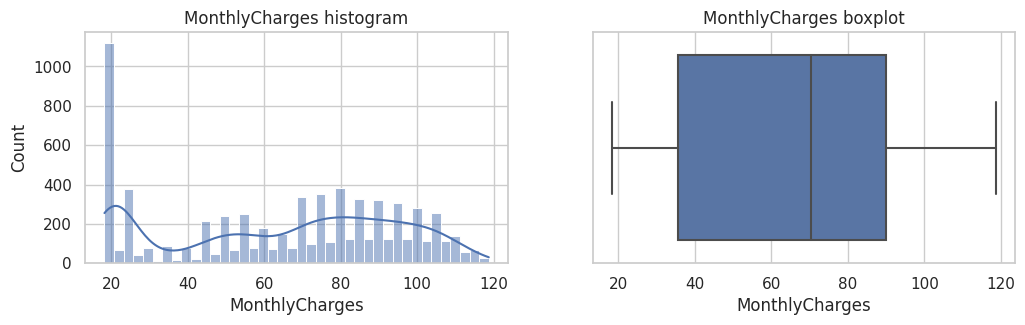

IQR outliers: 0 lower/upper: -46.025 / 171.375
Mann-Whitney U p-value: 0.0 grp0 n, grp1 n: 5174 1869

=== TotalCharges ===
dtype: float64 missing: 0
count/mean/std/min/25/50/75/max: 7043 2279.734 2266.794 0.0 398.55 1394.55 3786.6 8684.8
skew: 0.963


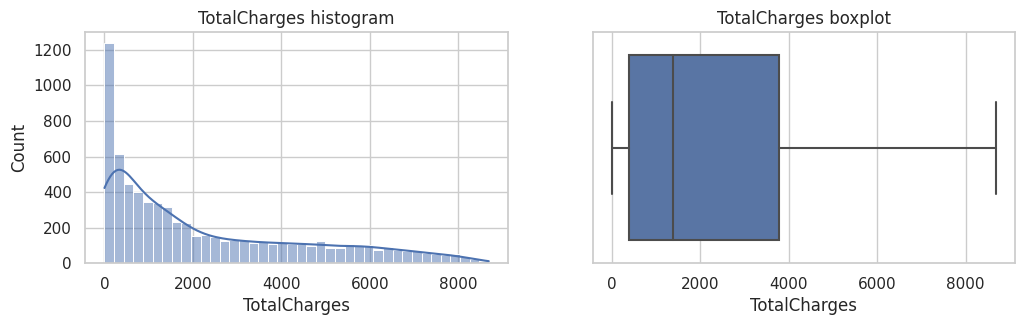

IQR outliers: 0 lower/upper: -4683.525 / 8868.675
Mann-Whitney U p-value: 0.0 grp0 n, grp1 n: 5174 1869

=== tenure_months_snapshot ===
dtype: float64 missing: 0
count/mean/std/min/25/50/75/max: 7043 33.064 24.199 0.0 10.05 29.01 56.04 76.02
skew: 0.244


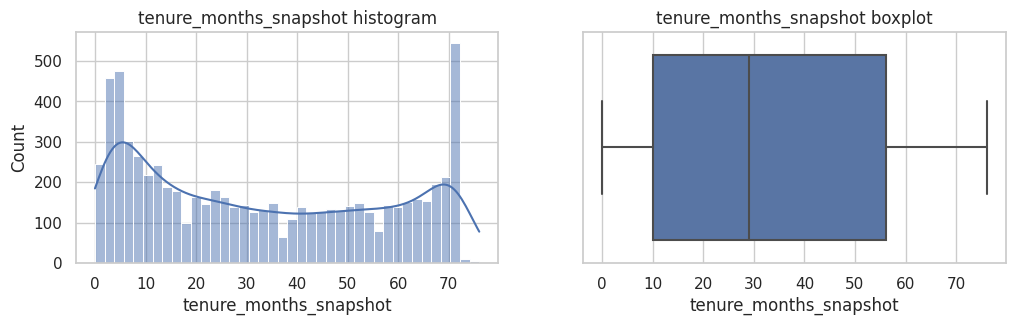

IQR outliers: 0 lower/upper: -58.935 / 125.025
Mann-Whitney U p-value: 0.0 grp0 n, grp1 n: 5174 1869

=== avg_monthly_from_total ===
dtype: float64 missing: 0
count/mean/std/min/25/50/75/max: 7043 59.504 30.861 3.887 25.534 61.645 85.311 120.729
skew: -0.001


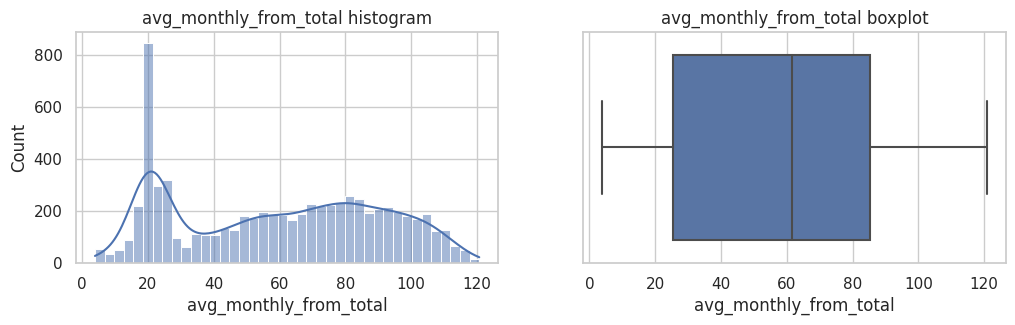

IQR outliers: 0 lower/upper: -64.132 / 174.977
Mann-Whitney U p-value: 0.0 grp0 n, grp1 n: 5174 1869

Correlation matrix for numeric features:
                        MonthlyCharges  TotalCharges  tenure_months_snapshot  \
MonthlyCharges                   1.000         0.651                   0.261   
TotalCharges                     0.651         1.000                   0.829   
tenure_months_snapshot           0.261         0.829                   1.000   
avg_monthly_from_total           0.916         0.763                   0.418   
TotalCharges_log1p               0.571         0.826                   0.831   

                        avg_monthly_from_total  TotalCharges_log1p  
MonthlyCharges                           0.916               0.571  
TotalCharges                             0.763               0.826  
tenure_months_snapshot                   0.418               0.831  
avg_monthly_from_total                   1.000               0.725  
TotalCharges_log1p             

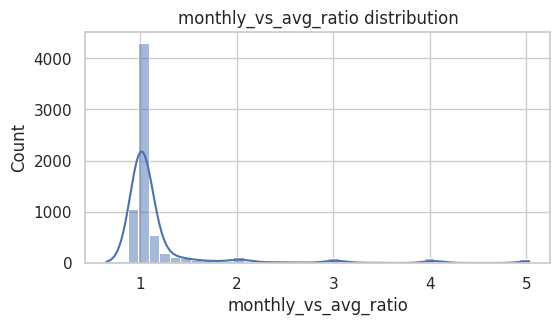

In [20]:
# Step 3: numeric distribution plots, skewness, IQR outlier counts, Mann-Whitney U test
sns.set(style="whitegrid")
df_eda = pd.read_csv("data/processed/merged_clean_eda.csv", low_memory=False)

num_cols = [c for c in ["MonthlyCharges","TotalCharges","tenure_months_snapshot","avg_monthly_from_total"] if c in df_eda.columns]
print("Numeric columns checked:", num_cols)

for c in num_cols:
    ser = df_eda[c]
    print(f"\n=== {c} ===")
    print("dtype:", ser.dtype, "missing:", ser.isna().sum())
    print("count/mean/std/min/25/50/75/max:",
          ser.count(), round(ser.mean(),3), round(ser.std(),3), round(ser.min(),3),
          round(ser.quantile(0.25),3), round(ser.median(),3), round(ser.quantile(0.75),3), round(ser.max(),3))
    print("skew:", round(ser.dropna().skew(),3))
    # plot
    fig, axs = plt.subplots(1,2, figsize=(12,3))
    sns.histplot(ser.dropna(), ax=axs[0], kde=True, bins=40)
    axs[0].set_title(f"{c} histogram")
    sns.boxplot(x=ser.dropna(), ax=axs[1])
    axs[1].set_title(f"{c} boxplot")
    plt.show()
    # IQR outliers
    q1, q3 = ser.quantile(0.25), ser.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ser[(ser < lower) | (ser > upper)].shape[0]
    print("IQR outliers:", outliers, "lower/upper:", round(lower,3), "/", round(upper,3))
    # Mann-Whitney U (nonparametric) between churn groups
    g0 = df_eda.loc[df_eda["churn_left"]==0, c].dropna()
    g1 = df_eda.loc[df_eda["churn_left"]==1, c].dropna()
    if len(g0) > 10 and len(g1) > 10:
        stat, p = mannwhitneyu(g0, g1, alternative="two-sided")
        print("Mann-Whitney U p-value:", round(p,6), "grp0 n, grp1 n:", len(g0), len(g1))
    else:
        print("Not enough data to run Mann-Whitney between groups for", c)

# correlation matrix for numeric columns (incl. log1p TotalCharges)
print("\nCorrelation matrix for numeric features:")
num_for_corr = num_cols.copy()
if "TotalCharges" in num_cols:
    df_eda["TotalCharges_log1p"] = np.log1p(df_eda["TotalCharges"].clip(lower=0))
    num_for_corr.append("TotalCharges_log1p")
print(df_eda[num_for_corr].corr().round(3))

# show distribution of monthly_vs_avg if present
if "avg_monthly_from_total" in df_eda.columns and "MonthlyCharges" in df_eda.columns:
    df_eda["monthly_vs_avg_ratio"] = (df_eda["MonthlyCharges"] / df_eda["avg_monthly_from_total"]).replace([np.inf, -np.inf], np.nan)
    print("\nmonthly_vs_avg_ratio skew:", round(df_eda["monthly_vs_avg_ratio"].dropna().skew(),3))
    plt.figure(figsize=(6,3))
    sns.histplot(df_eda["monthly_vs_avg_ratio"].dropna(), bins=40, kde=True)
    plt.title("monthly_vs_avg_ratio distribution")
    plt.show()

In [21]:
# quick check: MonthlyCharges by InternetService & Type 
df_eda = pd.read_csv("data/processed/merged_clean_eda.csv", low_memory=False)

print("MonthlyCharges by InternetService:")
print(df_eda.groupby("InternetService")["MonthlyCharges"].agg(["count","mean","median"]).sort_values("count", ascending=False))

print("\nMonthlyCharges by Type (Contract):")
print(df_eda.groupby("Type")["MonthlyCharges"].agg(["count","mean","median"]).sort_values("count", ascending=False))

MonthlyCharges by InternetService:
                     count       mean  median
InternetService                              
Fiber optic           3096  91.500129  91.675
DSL                   2421  58.102169  56.150
No internet service   1526  21.079194  20.150

MonthlyCharges by Type (Contract):
                count       mean  median
Type                                    
Month-to-month   3875  66.398490   73.25
Two year         1695  60.770413   64.35
One year         1473  65.048608   68.75


In [22]:
# inspect high monthly_vs_avg_ratio rows
df_eda = pd.read_csv("data/processed/merged_clean_eda.csv", low_memory=False)
df_eda["monthly_vs_avg_ratio"] = (df_eda["MonthlyCharges"] / df_eda["avg_monthly_from_total"]).replace([float("inf"), -float("inf")], pd.NA)
print("Counts: ratio>1.5, >2, >3:")
for thr in [1.5, 2, 3]:
    print(thr, (df_eda["monthly_vs_avg_ratio"] > thr).sum())
# sample the extreme ones
display(df_eda.loc[df_eda["monthly_vs_avg_ratio"] > 2, ["customerID","MonthlyCharges","avg_monthly_from_total","tenure_months_snapshot","TotalCharges","InternetService","Type"]].sample(min(10, (df_eda["monthly_vs_avg_ratio"]>2).sum()), random_state=42))

Counts: ratio>1.5, >2, >3:
1.5 686
2 501
3 292


,customerID,MonthlyCharges,avg_monthly_from_total,tenure_months_snapshot,TotalCharges,InternetService,Type
5300,8821-XNHVZ,80.05,39.240196,2.04,80.05,Fiber optic,Month-to-month
1144,0841-NULXI,35.55,8.799505,4.04,35.55,DSL,Month-to-month
5481,8473-VUVJN,73.65,14.642147,5.03,73.65,Fiber optic,Month-to-month
2194,2514-GINMM,79.50,15.805169,5.03,79.50,Fiber optic,Month-to-month
1530,3703-VAVCL,90.00,31.465232,6.04,190.05,Fiber optic,Month-to-month
5662,3244-DCJWY,70.25,17.388614,4.04,70.25,Fiber optic,Month-to-month
5538,4614-NUVZD,81.10,26.854305,3.02,81.10,Fiber optic,Month-to-month
1851,2485-ITVKB,35.10,13.667992,5.03,68.75,DSL,Month-to-month
983,8603-IJWDN,86.60,28.675497,3.02,86.60,Fiber optic,Month-to-month
6473,9223-UCPVT,94.40,18.767396,5.03,94.40,Fiber optic,Month-to-month


In [23]:
# Step 4: categorical churn rates, chi2, and rare-level detection 
EDA_FP = "data/processed/merged_clean_eda.csv"
df_eda = pd.read_csv(EDA_FP, low_memory=False)

# Choose categorical columns to inspect (object/category or a short manual list)
cat_cols = [c for c in df_eda.select_dtypes(include=["object","category"]).columns if c not in ("customerID","BeginDate")]
# ensure to look at already-engineered *_bin as numeric, skip them here
cat_cols = [c for c in cat_cols if not c.endswith("_bin")]

results = []
rare_threshold = 20  # mark levels with counts < 20 as rare

for c in cat_cols:
    vc = df_eda[c].value_counts(dropna=False)
    # churn rate per level
    churn_by_level = df_eda.groupby(c)["churn_left"].agg(["count","mean"]).rename(columns={"mean":"churn_rate"})
    churn_by_level = churn_by_level.sort_values("count", ascending=False)
    # chi2 test: build contingency table (levels x churn)
    try:
        ct = pd.crosstab(df_eda[c].fillna("##NA##"), df_eda["churn_left"])
        chi2, p, dof, ex = chi2_contingency(ct)
    except Exception as e:
        chi2, p, dof = np.nan, np.nan, np.nan
    # rare levels
    rare_levels = vc[vc < rare_threshold].index.tolist()
    results.append({
        "col": c,
        "n_levels": vc.shape[0],
        "top_levels": vc.head(6).to_dict(),
        "chi2_p": float(p) if not pd.isna(p) else None,
        "rare_level_count": int((vc < rare_threshold).sum()),
        "rare_levels_sample": rare_levels[:10]
    })
    # print condensed output for this column
    print(f"\n=== {c} (levels={vc.shape[0]}) ===")
    display(churn_by_level.head(12))
    print("Chi2 p-value:", p)
    if len(rare_levels) > 0:
        print(f"Rare levels (<{rare_threshold} rows): {len(rare_levels)}; sample: {rare_levels[:10]}")

# assemble summary df
summary = pd.DataFrame(results).sort_values("chi2_p")
print("\n\nCategorical summary (first rows):")
display(summary.head(40))

# save summary to CSV for report 
OUT_FP = "data/processed/categorical_eda_summary.csv"
summary.to_csv(OUT_FP, index=False)
print("Wrote categorical summary to:", OUT_FP)


=== Type (levels=3) ===


,count,churn_rate
Type,,
Month-to-month,3875,0.427097
Two year,1695,0.028319
One year,1473,0.112695


Chi2 p-value: 5.863038300673391e-258

=== PaperlessBilling (levels=2) ===


,count,churn_rate
PaperlessBilling,,
Yes,4171,0.335651
No,2872,0.163301


Chi2 p-value: 4.073354668665985e-58

=== PaymentMethod (levels=4) ===


,count,churn_rate
PaymentMethod,,
Electronic check,2365,0.452854
Mailed check,1612,0.191067
Bank transfer (automatic),1544,0.167098
Credit card (automatic),1522,0.152431


Chi2 p-value: 3.6823546520097993e-140

=== gender (levels=2) ===


,count,churn_rate
gender,,
Male,3555,0.261603
Female,3488,0.269209


Chi2 p-value: 0.48657873605618596

=== Partner (levels=2) ===


,count,churn_rate
Partner,,
No,3641,0.329580
Yes,3402,0.196649


Chi2 p-value: 2.1399113440759935e-36

=== Dependents (levels=2) ===


,count,churn_rate
Dependents,,
No,4933,0.312791
Yes,2110,0.154502


Chi2 p-value: 4.9249216612154196e-43

=== InternetService (levels=3) ===


,count,churn_rate
InternetService,,
Fiber optic,3096,0.418928
DSL,2421,0.189591
No internet service,1526,0.074050


Chi2 p-value: 9.571788222840544e-160

=== OnlineSecurity (levels=3) ===


,count,churn_rate
OnlineSecurity,,
No,3498,0.417667
Yes,2019,0.146112


Chi2 p-value: 2.6611496351767036e-185

=== OnlineBackup (levels=3) ===


,count,churn_rate
OnlineBackup,,
No,3088,0.399288
Yes,2429,0.215315


Chi2 p-value: 2.0797592160864276e-131

=== DeviceProtection (levels=3) ===


,count,churn_rate
DeviceProtection,,
No,3095,0.391276
Yes,2422,0.225021


Chi2 p-value: 5.505219496457244e-122

=== TechSupport (levels=3) ===


,count,churn_rate
TechSupport,,
No,3473,0.416355
Yes,2044,0.151663


Chi2 p-value: 1.4430840279998987e-180

=== StreamingTV (levels=3) ===


,count,churn_rate
StreamingTV,,
No,2810,0.335231
Yes,2707,0.300702


Chi2 p-value: 5.528994485739024e-82

=== StreamingMovies (levels=3) ===


,count,churn_rate
StreamingMovies,,
No,2785,0.336804
Yes,2732,0.299414


Chi2 p-value: 2.667756755723833e-82

=== MultipleLines (levels=3) ===


,count,churn_rate
MultipleLines,,
No,3390,0.250442
Yes,2971,0.286099
No phone service,682,0.249267


Chi2 p-value: 0.0034643829548773


Categorical summary (first rows):


,col,n_levels,top_levels,chi2_p,rare_level_count,rare_levels_sample
0,Type,3,"{'Month-to-month': 3875, 'Two year': 1695, 'On...",5.863038e-258,0,[]
7,OnlineSecurity,3,"{'No': 3498, 'Yes': 2019, nan: 1526}",2.661150e-185,0,[]
10,TechSupport,3,"{'No': 3473, 'Yes': 2044, nan: 1526}",1.443084e-180,0,[]
6,InternetService,3,"{'Fiber optic': 3096, 'DSL': 2421, 'No interne...",9.571788e-160,0,[]
2,PaymentMethod,4,"{'Electronic check': 2365, 'Mailed check': 161...",3.682355e-140,0,[]
8,OnlineBackup,3,"{'No': 3088, 'Yes': 2429, nan: 1526}",2.079759e-131,0,[]
9,DeviceProtection,3,"{'No': 3095, 'Yes': 2422, nan: 1526}",5.505219e-122,0,[]
12,StreamingMovies,3,"{'No': 2785, 'Yes': 2732, nan: 1526}",2.667757e-82,0,[]
11,StreamingTV,3,"{'No': 2810, 'Yes': 2707, nan: 1526}",5.528994e-82,0,[]
1,PaperlessBilling,2,"{'Yes': 4171, 'No': 2872}",4.073355e-58,0,[]


Wrote categorical summary to: data/processed/categorical_eda_summary.csv


In [24]:
# Step 5: mutual info, univariate ROC/PR, correlations, and filtered VIF
# Non-destructive: reads data/processed/merged_clean_eda.csv and writes CSV summaries to data/processed/
warnings.filterwarnings("ignore")

EDA_FP = "data/processed/merged_clean_eda.csv"
OUT_DIR = "data/processed"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(EDA_FP, low_memory=False)
# Use churn_left as the true label; exclude any alias columns (e.g., "target")
y = df["churn_left"]
drop_cols = {"customerID", "BeginDate", "churn_left", "target"}

# Detect columns by dtype groups
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in drop_cols and not c.endswith("_bin")]
bin_cols = [c for c in df.columns if c.endswith("_bin")]                 # candidate binary flags
cat_cols = [c for c in df.select_dtypes(include=["object","category"]).columns if c not in drop_cols and not c.endswith("_bin")]

print("Detected numeric cols (numeric dtypes):", num_cols)
print("Detected binary *_bin cols:", bin_cols)
print("Detected categorical (text/category) cols:", cat_cols)

# ----------------- Build X_mi safely (all numeric) -----------------
X_mi = pd.DataFrame(index=df.index)
cat_encoded_cols = []

# 1) numeric columns - coerce to floats (NaNs -> sentinel -999)
for c in num_cols:
    X_mi[c] = pd.to_numeric(df[c], errors="coerce").fillna(-999).astype(float)

# 2) binary _bin columns - map common string tokens to 0/1
def map_bin_series(s):
    if pd.api.types.is_numeric_dtype(s):
        return pd.to_numeric(s, errors="coerce")
    mapping = {
        "yes": 1, "y": 1, "true": 1, "1": 1,
        "no": 0, "n": 0, "false": 0, "0": 0,
        "no internet service": 0, "no phone service": 0
    }
    s_str = s.fillna("").astype(str).str.strip().str.lower()
    mapped = s_str.map(mapping)
    # if mapping covers most rows, return it; otherwise fallback to label encoding
    if mapped.isna().sum() <= len(s) * 0.5:
        return mapped
    # fallback label-encode string tokens
    le = LabelEncoder()
    enc = le.fit_transform(s_str.fillna("##NA##").astype(str))
    return pd.Series(enc, index=s.index)

for c in bin_cols:
    if c in df.columns:
        coerced = map_bin_series(df[c])
        X_mi[c] = pd.to_numeric(coerced, errors="coerce").fillna(-999).astype(float)

# 3) categorical text columns - label encode per column (so MI can treat as discrete)
for c in cat_cols:
    ser = df[c].fillna("##NA##").astype(str)
    le = LabelEncoder()
    enc = le.fit_transform(ser)
    X_mi[c] = enc
    cat_encoded_cols.append(c)

# Final guard - ensure every column is numeric
non_numeric_after = [col for col in X_mi.columns if X_mi[col].dtype.kind not in ("i","u","f")]
if non_numeric_after:
    print("WARNING: Converting remaining non-numeric columns via LabelEncoder:", non_numeric_after)
    for c in non_numeric_after:
        X_mi[c] = LabelEncoder().fit_transform(X_mi[c].astype(str).fillna("##NA##"))

# sanity
assert all(X_mi[col].dtype.kind in ("i","u","f") for col in X_mi.columns), \
       f"Non-numeric columns remain: {[c for c in X_mi.columns if X_mi[c].dtype.kind not in ('i','u','f')]}"

print("Prepared X_mi with shape:", X_mi.shape)
print("Sample dtypes (first 40):\n", X_mi.dtypes.head(40))

# ----------------- Mutual information -----------------
print("\nComputing mutual information (may take a moment)...")
discrete_mask = [col in cat_encoded_cols for col in X_mi.columns]
mi = mutual_info_classif(X_mi.values, y.values, discrete_features=discrete_mask, random_state=42)
mi_df = pd.DataFrame({"feature": X_mi.columns, "mi": mi}).sort_values("mi", ascending=False)
mi_df.to_csv(os.path.join(OUT_DIR, "feature_mi.csv"), index=False)
print("Wrote:", os.path.join(OUT_DIR, "feature_mi.csv"))

# ----------------- Univariate ROC AUC and PR AUC -----------------
def safe_score(score_func, y_true, y_score):
    try:
        return float(score_func(y_true, y_score))
    except Exception:
        return np.nan

uni_rows = []
# For numeric/binary features use X_mi values; for original categoricals compute level->target-mean mapping 
for c in X_mi.columns:
    ser = X_mi[c].astype(float)
    if ser.nunique() > 1:
        roc = safe_score(roc_auc_score, y, ser)
        pr  = safe_score(average_precision_score, y, ser)
    else:
        roc, pr = np.nan, np.nan
    typ = "categorical" if c in cat_encoded_cols else "numeric_or_bin"
    uni_rows.append({"feature": c, "type": typ, "roc_auc": roc, "pr_auc": pr, "n_unique": int(ser.nunique())})

uni_df = pd.DataFrame(uni_rows).sort_values("roc_auc", ascending=False)
uni_df.to_csv(os.path.join(OUT_DIR, "feature_univariate_auc.csv"), index=False)
print("Wrote:", os.path.join(OUT_DIR, "feature_univariate_auc.csv"))

# ----------------- Correlation matrix -----------------
corr = X_mi.corr().round(3)
corr.to_csv(os.path.join(OUT_DIR, "numeric_correlations.csv"))
print("Wrote:", os.path.join(OUT_DIR, "numeric_correlations.csv"))

# ----------------- VIF: Filtered and safe computation -----------------
# keep continuous numerics + binary flags; exclude label-encoded text columns
vif_candidates = [c for c in X_mi.columns if (c not in cat_encoded_cols)]
# Remove sentinel/constant columns (zero variance)
vif_candidates = [c for c in vif_candidates if X_mi[c].nunique() > 1]

# If still many columns, drop exact-duplicate columns and near-perfectly correlated pairs (abs(corr)>0.9999)
X_vif = X_mi[vif_candidates].copy()

# drop duplicate columns (identical values)
dup_cols = X_vif.T.duplicated()
if dup_cols.any():
    to_drop = X_vif.columns[dup_cols].tolist()
    print("Dropping duplicate columns before VIF:", to_drop)
    X_vif = X_vif.loc[:, ~X_vif.T.duplicated()]

# iteratively drop near-perfect correlations > 0.9999 (keeps the first of each pair)
while True:
    cmat = X_vif.corr().abs()
    np.fill_diagonal(cmat.values, 0)
    # find first pair > threshold
    pairs = np.where(cmat.values > 0.9999)
    if len(pairs[0]) == 0:
        break
    i, j = pairs[0][0], pairs[1][0]
    col_i, col_j = X_vif.columns[i], X_vif.columns[j]
    # drop column j to break perfect collinearity
    print(f"Dropping near-duplicate column before VIF: {col_j} (corr with {col_i} >= 0.9999)")
    X_vif = X_vif.drop(columns=[col_j])

# final VIF compute (if any columns remain)
vif_df = pd.DataFrame(columns=["feature","vif"])
if X_vif.shape[1] > 0:
    X_const = sm.add_constant(X_vif.fillna(0).astype(float))
    vifs = []
    for i, col in enumerate(X_vif.columns):
        try:
            vif_val = variance_inflation_factor(X_const.values, i+1)  # +1 offset for const
        except Exception:
            vif_val = float("inf")
        vifs.append({"feature": col, "vif": vif_val})
    vif_df = pd.DataFrame(vifs).sort_values("vif", ascending=False)
else:
    print("No varying numeric columns suitable for VIF after filtering.")

vif_df.to_csv(os.path.join(OUT_DIR, "numeric_vif.csv"), index=False)
print("Wrote:", os.path.join(OUT_DIR, "numeric_vif.csv"))

# ----------------- Combined summary -----------------
summary = mi_df.merge(uni_df, on="feature", how="outer").merge(vif_df, on="feature", how="left")
summary.to_csv(os.path.join(OUT_DIR, "feature_summary_combined.csv"), index=False)
print("Wrote:", os.path.join(OUT_DIR, "feature_summary_combined.csv"))

# ----------------- Print quick top results for immediate inspection -----------------
print("\nTop 20 MI features:\n", mi_df.head(20).to_string(index=False))
print("\nTop 20 univariate ROC AUC:\n", uni_df.sort_values("roc_auc", ascending=False).head(20).to_string(index=False))
print("\nTop VIFs (first 20 rows):")
print(vif_df.head(20).to_string(index=False))

print("\nStep 5 complete. Files written to data/processed/:")
print(" - feature_mi.csv")
print(" - feature_univariate_auc.csv")
print(" - numeric_correlations.csv")
print(" - numeric_vif.csv")
print(" - feature_summary_combined.csv")

Detected numeric cols (numeric dtypes): ['MonthlyCharges', 'TotalCharges', 'tenure_months_snapshot', 'SeniorCitizen', 'num_internet_services', 'has_internet', 'has_phone', 'num_services', 'avg_monthly_from_total', 'payment_auto', 'active_at_snapshot', 'internet_service_missing', 'multiplelines_missing']
Detected binary *_bin cols: ['PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'tenure_bin']
Detected categorical (text/category) cols: ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
Prepared X_mi with shape: (7043, 38)
Sample dtypes (first 40):
 MonthlyCharges              float64
TotalCharges                float64
tenure_months_snapshot      float64
SeniorCitize

In [25]:
# FE canonicalization — apply conservative fixes 
# Writes: data/processed/merged_clean_fe.csv and data/processed/merged_clean_fe_df.joblib
EDA_FP = "data/processed/merged_clean_eda.csv"
OUT_FP = "data/processed/merged_clean_fe.csv"
OUT_JOBLIB = "data/processed/merged_clean_fe_df.joblib"
os.makedirs("data/processed", exist_ok=True)

df = pd.read_csv(EDA_FP, low_memory=False)

# 1) Drop obvious label/alias columns that leak or duplicate the target
for drop in ["target"]:   # add any other alias columns here if present
    if drop in df.columns:
        df.drop(columns=[drop], inplace=True)

# 2) Drop or fix redundant / duplicated feature columns (based on VIF diagnostics)
# - Drop num_services if it exists (it duplicates has_phone + num_internet_services)
if "num_services" in df.columns:
    df.drop(columns=["num_services"], inplace=True)
# - Drop avg_monthly_from_total (redundant with MonthlyCharges)
if "avg_monthly_from_total" in df.columns:
    df.drop(columns=["avg_monthly_from_total"], inplace=True)

# 3) Ensure *_bin columns exist and are canonical 0/1 Int64
bin_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MultipleLines"]
for c in bin_cols:
    txt_col = c
    bin_col = f"{c}_bin"
    if txt_col in df.columns:
        # mapping covers 'Yes','No','No internet service','No phone service' etc.
        mapping = {"yes":1, "y":1, "true":1, "1":1, "no":0, "n":0, "false":0, "0":0,
                   "no internet service":0, "no phone service":0}
        df[bin_col] = df[txt_col].astype(str).str.strip().str.lower().map(mapping)
        # Keep Int64 nullable
        df[bin_col] = df[bin_col].astype("Int64")
    # if bin col missing but textual not present, ensure column at least exists
    elif bin_col not in df.columns:
        df[bin_col] = pd.Series([pd.NA]*len(df), dtype="Int64")

# 4) Create missingness indicators 
if "InternetService" in df.columns:
    df["internet_service_missing"] = df["OnlineSecurity"].isna().astype(int)  # earlier mapping: OnlineSecurity NA <=> no internet
if "MultipleLines" in df.columns:
    df["multiplelines_missing"] = df["MultipleLines"].isna().astype(int)

# 5) Numeric transforms / derived features
# - TotalCharges_log1p for linear models (create if TotalCharges present)
if "TotalCharges" in df.columns:
    # ensure non-negative
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)
    df["TotalCharges_log1p"] = np.log1p(df["TotalCharges"].clip(lower=0))

# - tenure bins and new_customer flag
if "tenure_months_snapshot" in df.columns:
    # create coarse bins (example thresholds)
    bins = [-1, 3, 12, 36, 60, 999]
    labels = ["very_short","short","medium","long","very_long"]
    df["tenure_bin"] = pd.cut(df["tenure_months_snapshot"].fillna(0), bins=bins, labels=labels)
    df["tenure_bin"] = df["tenure_bin"].astype(str)  # keep as text categorical for later encoding
    df["new_customer"] = (df["tenure_months_snapshot"].fillna(0) <= 3).astype(int)

# 6) Keep MonthlyCharges numeric
if "MonthlyCharges" in df.columns:
    df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce").fillna(0.0)

# 7) Drop original text service Yes/No columns to avoid duplicates in preprocessor 
for c in bin_cols:
    if c in df.columns:
        try:
            df.drop(columns=[c], inplace=True)
        except Exception:
            pass

# 8) Save outputs
df.to_csv(OUT_FP, index=False)
joblib.dump(df, OUT_JOBLIB)
print("Wrote FE working copy to:", OUT_FP)
print("Wrote joblib:", OUT_JOBLIB)
print("FE canonicalization complete. Sample columns:")
print(df.columns.tolist()[:80])

Wrote FE working copy to: data/processed/merged_clean_fe.csv
Wrote joblib: data/processed/merged_clean_fe_df.joblib
FE canonicalization complete. Sample columns:
['customerID', 'BeginDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure_months_snapshot', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'num_internet_services', 'has_internet', 'has_phone', 'payment_auto', 'churn_left', 'active_at_snapshot', 'internet_service_missing', 'multiplelines_missing', 'tenure_bin', 'TotalCharges_log1p', 'new_customer']


In [26]:
# FE implementation: build and save preprocessor + manifest (non-destructive)
FE_FP = "data/processed/merged_clean_fe.csv"
OUT_PREPROC = "data/processed/preprocessor.joblib"
OUT_MANIFEST = "data/processed/preprocessor_manifest.json"
os.makedirs("data/processed", exist_ok=True)

df = pd.read_csv(FE_FP, low_memory=False)

# === Canonical feature lists ===
numeric_features = [c for c in ["MonthlyCharges","TotalCharges_log1p","tenure_months_snapshot"] if c in df.columns]

# binary *_bin and engineered binary flags
binary_features = [c for c in df.columns if c.endswith("_bin")]
# include the additional binary flags we created
for extra in ["new_customer","internet_service_missing","multiplelines_missing"]:
    if extra in df.columns and extra not in binary_features:
        binary_features.append(extra)

# low-cardinality categoricals to OHE
categorical_features = [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns]

# Deduplicate/ensure disjoint lists
def unique_preserve(seq):
    seen = set(); out=[]
    for x in seq:
        if x not in seen:
            out.append(x); seen.add(x)
    return out

numeric_features = unique_preserve(numeric_features)
binary_features = [c for c in unique_preserve(binary_features) if c not in numeric_features]
categorical_features = [c for c in unique_preserve(categorical_features) if c not in numeric_features and c not in binary_features]

# Final features used by preprocessor
features_for_model = numeric_features + binary_features + categorical_features

print("Numeric features:", numeric_features)
print("Binary features (sample):", binary_features[:40])
print("Categorical features:", categorical_features)
print("Total feature count:", len(features_for_model))

# === Build preprocessor ===
numeric_transformer = Pipeline([("scaler", StandardScaler())])
ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("bin", "passthrough", binary_features),
    ("cat", ohe, categorical_features)
], remainder="drop", sparse_threshold=0.0)

# Fit the preprocessor on the full FE dataset (only to learn OHE categories and scaler params)
print("Fitting preprocessor (learn OHE categories / scaler stats)...")
preprocessor.fit(df[features_for_model])

# Save preprocessor artifact
joblib.dump(preprocessor, OUT_PREPROC)
print("Saved preprocessor to:", OUT_PREPROC)

# Build manifest with details for reproducibility
manifest = {
    "source_fe_file": FE_FP,
    "preprocessor_joblib": OUT_PREPROC,
    "numeric_features": numeric_features,
    "binary_features": binary_features,
    "categorical_features": categorical_features,
    "features_for_model": features_for_model,
    "notes": [
        "avg_monthly_from_total dropped (redundant with MonthlyCharges)",
        "num_services dropped (aggregate duplicate)",
        "Binary *_bin columns are kept as numeric 0/1 and passed through (no further scaling applied)",
        "Categoricals are OneHotEncoded with handle_unknown='ignore' and sparse output",
        "TotalCharges_log1p was created in FE and used instead of raw TotalCharges for linear models"
    ]
}

with open(OUT_MANIFEST, "w") as f:
    json.dump(manifest, f, indent=2)

print("Wrote manifest to:", OUT_MANIFEST)
print("FE implementation complete.")

Numeric features: ['MonthlyCharges', 'TotalCharges_log1p', 'tenure_months_snapshot']
Binary features (sample): ['PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'tenure_bin', 'new_customer', 'internet_service_missing', 'multiplelines_missing']
Categorical features: ['Type', 'PaymentMethod', 'InternetService']
Total feature count: 20
Fitting preprocessor (learn OHE categories / scaler stats)...
Saved preprocessor to: data/processed/preprocessor.joblib
Wrote manifest to: data/processed/preprocessor_manifest.json
FE implementation complete.


In [27]:
# EDA Visualizations & quick diagnostics (save PNGs to data/figures/)
sns.set(style="whitegrid")
FE_FP = "data/processed/merged_clean_fe.csv"
OUT_DIR = "data/figures"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(FE_FP, low_memory=False)

# Features to plot (guard missing)
num_cols = [c for c in ["MonthlyCharges","TotalCharges_log1p","TotalCharges","tenure_months_snapshot"] if c in df.columns]
cat_cols = [c for c in ["Type","PaymentMethod","InternetService","tenure_bin","PaperlessBilling"] if c in df.columns]
bin_sample = [c for c in df.columns if c.endswith("_bin")]
bin_sample = bin_sample[:6]  # plot a few binary flags

saved = []

# 1) Univariate histograms + KDE for numerics
for c in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[c].dropna(), kde=True, bins=40)
    plt.title(f"{c} histogram")
    plt.xlabel(c)
    plt.ylabel("count")
    out = os.path.join(OUT_DIR, f"{c}_hist.png")
    plt.tight_layout()
    plt.savefig(out)
    plt.close()
    saved.append(out)

# 2) Boxplots for numerics to visualize spread/outliers
for c in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[c].dropna())
    plt.title(f"{c} boxplot")
    out = os.path.join(OUT_DIR, f"{c}_box.png")
    plt.tight_layout()
    plt.savefig(out)
    plt.close()
    saved.append(out)

# 3) MonthlyCharges by InternetService and by Type 
if "MonthlyCharges" in df.columns:
    if "InternetService" in df.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(x="InternetService", y="MonthlyCharges", data=df)
        plt.title("MonthlyCharges by InternetService")
        out = os.path.join(OUT_DIR, "MonthlyCharges_by_InternetService.png")
        plt.tight_layout(); plt.savefig(out); plt.close(); saved.append(out)
    if "Type" in df.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(x="Type", y="MonthlyCharges", data=df)
        plt.title("MonthlyCharges by Contract Type")
        out = os.path.join(OUT_DIR, "MonthlyCharges_by_Type.png")
        plt.tight_layout(); plt.savefig(out); plt.close(); saved.append(out)

# 4) churn rate by key categorical (bar plots)
if "churn_left" in df.columns:
    for c in [col for col in cat_cols if col in df.columns]:
        agg = df.groupby(c)["churn_left"].agg(["count","mean"]).reset_index().sort_values("mean", ascending=False)
        plt.figure(figsize=(8,4))
        sns.barplot(x=c, y="mean", data=agg)
        plt.ylabel("churn_rate")
        plt.xlabel(c)
        plt.title(f"Churn rate by {c}")
        out = os.path.join(OUT_DIR, f"churn_rate_by_{c}.png")
        plt.tight_layout(); plt.savefig(out); plt.close(); saved.append(out)

# 5) Pairwise scatter of MonthlyCharges vs TotalCharges (log) colored by churn 
if "MonthlyCharges" in df.columns and ("TotalCharges" in df.columns or "TotalCharges_log1p" in df.columns):
    ycol = "TotalCharges_log1p" if "TotalCharges_log1p" in df.columns else "TotalCharges"
    plt.figure(figsize=(7,5))
    if "churn_left" in df.columns:
        sns.scatterplot(x="MonthlyCharges", y=ycol, hue="churn_left", data=df.sample(frac=min(1, 2000/len(df)), random_state=42), alpha=0.6, s=20)
    else:
        sns.scatterplot(x="MonthlyCharges", y=ycol, data=df.sample(frac=min(1, 2000/len(df)), random_state=42), alpha=0.6, s=20)
    plt.title("MonthlyCharges vs " + ycol)
    out = os.path.join(OUT_DIR, f"MonthlyCharges_vs_{ycol}.png")
    plt.tight_layout(); plt.savefig(out); plt.close(); saved.append(out)

# 6) Heatmap of numeric correlations (subset)
corr_cols = [c for c in num_cols + ["has_internet","has_phone"] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
    plt.title("Correlation matrix (selected numeric)")
    out = os.path.join(OUT_DIR, "numeric_correlation_matrix.png")
    plt.tight_layout(); plt.savefig(out); plt.close(); saved.append(out)

# 7) Binary feature churn comparison 
if "churn_left" in df.columns and len(bin_sample) > 0:
    n = len(bin_sample)
    cols = min(n,6)
    fig, axes = plt.subplots(nrows=(cols+1)//3, ncols=3, figsize=(12, 3*((cols+1)//3)))
    axes = axes.flatten()
    for i, b in enumerate(bin_sample):
        agg = df.groupby(b)["churn_left"].agg(["count","mean"]).reset_index()
        sns.barplot(x=b, y="mean", data=agg, ax=axes[i])
        axes[i].set_title(f"Churn by {b}")
        axes[i].set_ylabel("churn_rate")
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    out = os.path.join(OUT_DIR, "binary_churn_grid.png")
    plt.tight_layout(); plt.savefig(out); plt.close(); saved.append(out)

# 8) Outlier summaries: percentiles for TotalCharges (raw) and MonthlyCharges, and monthly_vs_avg_ratio 
print("\nOutlier / percentile summary:")
for c in ["TotalCharges","TotalCharges_log1p","MonthlyCharges","monthly_vs_avg_ratio"]:
    if c in df.columns:
        ser = pd.to_numeric(df[c], errors="coerce").dropna()
        p = np.percentile(ser, [50,75,90,95,99,99.5,100])
        print(f"{c} percentiles (50,75,90,95,99,99.5,100): {np.round(p,3).tolist()}  n={len(ser)}")
        # show top rows for extreme values for manual inspection
        topN = df.loc[ser.sort_values(ascending=False).index][:10]
        if not topN.empty:
            display_cols = ["customerID"] if "customerID" in df.columns else []
            display_cols += [c, "MonthlyCharges", "tenure_months_snapshot", "InternetService", "Type", "churn_left"]
            display_cols = [col for col in display_cols if col in df.columns]
            print(f"Top 10 rows by {c}:")
            print(topN[display_cols].head(10).to_string(index=False))
    else:
        pass

# Done
print("\nSaved figures:")
for f in saved:
    print(" -", f)
print("\nVisualization step complete.")


Outlier / percentile summary:
TotalCharges percentiles (50,75,90,95,99,99.5,100): [1394.55, 3786.6, 5973.69, 6921.025, 8039.256, 8304.254, 8684.8]  n=7043
Top 10 rows by TotalCharges:
customerID  TotalCharges  MonthlyCharges  tenure_months_snapshot InternetService     Type  churn_left
2889-FPWRM       8684.80          117.80                   76.02     Fiber optic One year           1
7569-NMZYQ       8672.45          118.75                   71.98     Fiber optic Two year           0
9739-JLPQJ       8670.10          117.50                   71.98     Fiber optic Two year           0
9788-HNGUT       8594.40          116.95                   71.98     Fiber optic Two year           0
8879-XUAHX       8564.75          116.25                   71.06     Fiber optic Two year           0
9924-JPRMC       8547.15          118.20                   71.98     Fiber optic Two year           0
0675-NCDYU       8543.25          116.40                   71.98     Fiber optic Two year           0

In [28]:
# Apply small FE fixes (cap/clip/flags), update preprocessor and re-run Step 5 diagnostics
# Non-destructive to original master; updates merged_clean_fe.csv, preprocessor.joblib, and Step5 CSVs
warnings.filterwarnings("ignore")
OUT_DIR = "data/processed"
os.makedirs(OUT_DIR, exist_ok=True)

FE_FP = os.path.join(OUT_DIR, "merged_clean_fe.csv")
if not os.path.exists(FE_FP):
    raise FileNotFoundError(f"FE file not found: {FE_FP} - run FE canonicalization first")

df = pd.read_csv(FE_FP, low_memory=False)
print("Loaded FE file:", FE_FP, "shape:", df.shape)

# 1) monthly_vs_avg_ratio clip & flag 
if "monthly_vs_avg_ratio" not in df.columns and "avg_monthly_from_total" in df.columns:
    df["monthly_vs_avg_ratio"] = df["MonthlyCharges"].astype(float) / df["avg_monthly_from_total"].replace(0, np.nan)
if "monthly_vs_avg_ratio" in df.columns:
    df["monthly_vs_avg_ratio_clipped"] = df["monthly_vs_avg_ratio"].replace([np.inf, -np.inf], np.nan).fillna(0).clip(upper=3.0)
    df["monthly_vs_avg_ratio_gt_2"] = (df["monthly_vs_avg_ratio"].fillna(0) > 2.0).astype(int)

# 2) Cap TotalCharges at 99.5th percentile and create capped log1p
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0.0)
    p995 = df["TotalCharges"].quantile(0.995)
    df["TotalCharges_capped"] = df["TotalCharges"].clip(upper=p995)
    df["TotalCharges_log1p_capped"] = np.log1p(df["TotalCharges_capped"].clip(lower=0.0))
    print(f"Capped TotalCharges at 99.5th percentile: {p995:.2f}")

# 3) Interaction flag: month_to_month_and_echeck
if "Type" in df.columns and "PaymentMethod" in df.columns:
    df["month_to_month_and_echeck"] = ((df["Type"].astype(str).str.lower() == "month-to-month") &
                                       (df["PaymentMethod"].astype(str).str.lower() == "electronic check")).astype(int)

# 4) Save updated FE file and joblib
joblib.dump(df, os.path.join(OUT_DIR, "merged_clean_fe_df.joblib"))
df.to_csv(FE_FP, index=False)
print("Wrote updated FE file to:", FE_FP)

# 5) Build and fit preprocessor using new numeric list 
numeric_features = []
for cand in ["MonthlyCharges", "TotalCharges_log1p_capped", "TotalCharges_log1p", "TotalCharges_capped", "tenure_months_snapshot"]:
    if cand in df.columns:
        numeric_features.append(cand)
numeric_features = list(dict.fromkeys(numeric_features))

binary_features = [c for c in df.columns if c.endswith("_bin")]
for extra in ["new_customer","internet_service_missing","multiplelines_missing","monthly_vs_avg_ratio_gt_2","month_to_month_and_echeck"]:
    if extra in df.columns and extra not in binary_features:
        binary_features.append(extra)

categorical_features = [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns]

def unique_preserve(seq):
    seen = set(); out=[]
    for x in seq:
        if x not in seen:
            out.append(x); seen.add(x)
    return out

numeric_features = unique_preserve(numeric_features)
binary_features = [c for c in unique_preserve(binary_features) if c not in numeric_features]
categorical_features = [c for c in unique_preserve(categorical_features) if c not in numeric_features and c not in binary_features]

features_for_model = numeric_features + binary_features + categorical_features
print("Preprocessor feature lists -> numeric:", numeric_features, "binary_count:", len(binary_features), "categorical:", categorical_features)

numeric_transformer = Pipeline([("scaler", StandardScaler())])
ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("bin", "passthrough", binary_features),
    ("cat", ohe, categorical_features)
], remainder="drop", sparse_threshold=0.0)

preprocessor.fit(df[features_for_model])
joblib.dump(preprocessor, os.path.join(OUT_DIR, "preprocessor.joblib"))
manifest = {
    "source_fe_file": FE_FP,
    "numeric_features": numeric_features,
    "binary_features": binary_features,
    "categorical_features": categorical_features,
    "features_for_model": features_for_model
}
with open(os.path.join(OUT_DIR, "preprocessor_manifest.json"), "w") as f:
    json.dump(manifest, f, indent=2)
print("Saved preprocessor.joblib and manifest")

# 6) Re-run robust Step 5 diagnostics (mutual info, univariate AUC, correlations, filtered VIF)
drop_cols = {"customerID", "BeginDate", "churn_left", "target"}
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in drop_cols and not c.endswith("_bin")]
bin_cols = [c for c in df.columns if c.endswith("_bin")] + [c for c in ["new_customer","internet_service_missing","multiplelines_missing","monthly_vs_avg_ratio_gt_2","month_to_month_and_echeck"] if c in df.columns]
bin_cols = [c for c in unique_preserve(bin_cols) if c in df.columns]
cat_cols = [c for c in df.select_dtypes(include=["object","category"]).columns if c not in drop_cols and not c.endswith("_bin")]

X_mi = pd.DataFrame(index=df.index)
cat_encoded_cols = []
for c in num_cols:
    X_mi[c] = pd.to_numeric(df[c], errors="coerce").fillna(-999).astype(float)
for c in bin_cols:
    if c in df.columns:
        X_mi[c] = pd.to_numeric(df[c], errors="coerce").fillna(-999).astype(float)
for c in cat_cols:
    ser = df[c].fillna("##NA##").astype(str)
    le = LabelEncoder(); enc = le.fit_transform(ser)
    X_mi[c] = enc; cat_encoded_cols.append(c)

y = df["churn_left"].astype(int)
discrete_mask = [col in cat_encoded_cols for col in X_mi.columns]
mi = mutual_info_classif(X_mi.values, y.values, discrete_features=discrete_mask, random_state=42)
mi_df = pd.DataFrame({"feature": X_mi.columns, "mi": mi}).sort_values("mi", ascending=False)
mi_df.to_csv(os.path.join(OUT_DIR, "feature_mi.csv"), index=False)
print("Wrote feature_mi.csv (top 15):")
print(mi_df.head(15).to_string(index=False))

uni_rows = []
def safe_score(score_func, y_true, y_score):
    try:
        return float(score_func(y_true, y_score))
    except Exception:
        return np.nan

for c in X_mi.columns:
    ser = X_mi[c].astype(float)
    if ser.nunique() > 1:
        roc = safe_score(roc_auc_score, y, ser)
        pr  = safe_score(average_precision_score, y, ser)
    else:
        roc, pr = np.nan, np.nan
    typ = "categorical" if c in cat_encoded_cols else "numeric_or_bin"
    uni_rows.append({"feature": c, "type": typ, "roc_auc": roc, "pr_auc": pr, "n_unique": int(ser.nunique())})

uni_df = pd.DataFrame(uni_rows).sort_values("roc_auc", ascending=False)
uni_df.to_csv(os.path.join(OUT_DIR, "feature_univariate_auc.csv"), index=False)
print("Wrote feature_univariate_auc.csv (top 15):")
print(uni_df.head(15).to_string(index=False))

corr = X_mi.corr().round(3)
corr.to_csv(os.path.join(OUT_DIR, "numeric_correlations.csv"))
print("Wrote numeric_correlations.csv")

# filtered VIF
vif_candidates = [c for c in X_mi.columns if c not in cat_encoded_cols]
X_vif = X_mi[vif_candidates].copy().fillna(0)
X_vif = X_vif.loc[:, X_vif.nunique() > 1]

if X_vif.T.duplicated().any():
    print("Dropping duplicate columns before VIF:", list(X_vif.columns[X_vif.T.duplicated()]))
    X_vif = X_vif.loc[:, ~X_vif.T.duplicated()]

while True:
    cmat = X_vif.corr().abs()
    np.fill_diagonal(cmat.values, 0)
    pairs = np.where(cmat.values > 0.9999)
    if len(pairs[0]) == 0:
        break
    i, j = pairs[0][0], pairs[1][0]
    col_j = X_vif.columns[j]
    print(f"Dropping near-duplicate column before VIF: {col_j}")
    X_vif = X_vif.drop(columns=[col_j])

vif_df = pd.DataFrame(columns=["feature","vif"])
if X_vif.shape[1] > 0:
    X_const = sm.add_constant(X_vif)
    vifs = []
    for i, col in enumerate(X_vif.columns):
        try:
            vif_val = variance_inflation_factor(X_const.values, i+1)
        except Exception:
            vif_val = float("inf")
        vifs.append({"feature": col, "vif": vif_val})
    vif_df = pd.DataFrame(vifs).sort_values("vif", ascending=False)

vif_df.to_csv(os.path.join(OUT_DIR, "numeric_vif.csv"), index=False)
print("Wrote numeric_vif.csv (top rows):")
print(vif_df.head(20).to_string(index=False))

summary = mi_df.merge(uni_df, on="feature", how="outer").merge(vif_df, on="feature", how="left")
summary.to_csv(os.path.join(OUT_DIR, "feature_summary_combined.csv"), index=False)
print("Wrote feature_summary_combined.csv")

Loaded FE file: data/processed/merged_clean_fe.csv shape: (7043, 34)
Capped TotalCharges at 99.5th percentile: 8304.25
Wrote updated FE file to: data/processed/merged_clean_fe.csv
Preprocessor feature lists -> numeric: ['MonthlyCharges', 'TotalCharges_log1p_capped', 'TotalCharges_log1p', 'TotalCharges_capped', 'tenure_months_snapshot'] binary_count: 15 categorical: ['Type', 'PaymentMethod', 'InternetService']
Saved preprocessor.joblib and manifest
Wrote feature_mi.csv (top 15):
                  feature       mi
       active_at_snapshot 0.579664
                     Type 0.098453
   tenure_months_snapshot 0.091406
month_to_month_and_echeck 0.065862
          TechSupport_bin 0.065088
       OnlineSecurity_bin 0.064519
          InternetService 0.055574
         OnlineBackup_bin 0.048146
            PaymentMethod 0.044519
TotalCharges_log1p_capped 0.044358
             TotalCharges 0.043558
      TotalCharges_capped 0.043249
           MonthlyCharges 0.043238
       TotalCharges_log1p 0

# EDA Summary — Churn Modeling Project

This summarizes the Exploratory Data Analysis (EDA) stage I completed for the churn modeling project. It captures what I inspected, the key empirical findings, implemented feature decisions, and the minimal guidance to proceed to Feature Engineering and modeling.

---

## Quick narrative
I inspected distributions, relationships with churn, and multicollinearity for the most important variables. Based on the visual and numeric diagnostics (churn rates by group, histograms/KDEs/boxplots, MonthlyCharges vs TotalCharges, mutual information and univariate ROC/PR, and filtered VIFs), I implemented a small set of conservative feature fixes (outlier handling, a few engineered flags and interactions) and saved a canonical FE dataset and preprocessor.

---

## Key empirical findings
- Contract (Type) and Tenure are among the strongest predictors: month-to-month customers and short-tenure customers have much higher churn.
- InternetService matters: Fiber optic customers have substantially higher churn than DSL or No internet service.
- PaymentMethod matters: Electronic check has a substantially higher churn rate than other methods.
- MonthlyCharges is multi-modal (a low cluster at ~20 for "No internet service" and a broad distribution above ~40). MonthlyCharges correlates with InternetService.
- TotalCharges is long-tailed and strongly correlated with tenure (corr ≈ 0.8). Log-transform and capping are appropriate.
- Several service add-ons (OnlineSecurity, TechSupport, DeviceProtection, OnlineBackup) show protective effects (lower churn when present).
- Interaction of month-to-month contract + electronic check is a high-risk combination and adds signal.

---

## Actions implemented (FE fixes already applied)
- Created and saved: `data/processed/merged_clean_fe.csv` (final FE table).
- Encoded Yes/No services to binary flags (`*_bin`) and created semantic missingness indicators (e.g., `internet_service_missing`, `multiplelines_missing`).
- Tenure:
  - Kept `tenure_months_snapshot` numeric.
  - Created `tenure_bin` (categorical buckets) and `new_customer` flag (tenure <= 3).
- TotalCharges:
  - Converted to numeric, applied a 99.5th‑percentile cap (`TotalCharges_capped`), then created `TotalCharges_log1p_capped`.
  - Kept log1p of capped values as the preferred representation for linear models.
- MonthlyCharges:
  - Left as numeric (scaled for linear models in preprocessor).
  - Created `monthly_vs_avg_ratio` (where available), clipped it at 3 (`monthly_vs_avg_ratio_clipped`) and added a flag `monthly_vs_avg_ratio_gt_2` to capture billing anomalies.
- Interaction:
  - Created `month_to_month_and_echeck` flag to capture the month-to-month + electronic-check high-risk group.
- Preprocessor:
  - Fitted and saved `data/processed/preprocessor.joblib`.
  - Wrote `data/processed/preprocessor_manifest.json` with the canonical feature lists used by the preprocessor.

---

## Encoding & modeling recommendations
- Categorical encoding:
  - One‑Hot Encode low-cardinality categoricals: `Type`, `PaymentMethod`, `InternetService`, `tenure_bin`.
  - Use `OneHotEncoder(handle_unknown='ignore')` to avoid errors on unseen categories.
- Binary flags:
  - Pass through `*_bin` and engineered binary flags as numeric 0/1.
- Numerical features:
  - For tree models: keep the full numeric set (MonthlyCharges, TotalCharges_capped/log1p, tenure_months_snapshot).
  - For linear models: prefer a reduced numeric set to manage VIF (e.g., MonthlyCharges + tenure_months_snapshot OR TotalCharges_log1p_capped) and apply Standard scaling + L2 regularization (LogisticRegression with `penalty='l2'`).
- Collinearity:
  - TotalCharges and tenure are highly collinear (expected); VIFs are high for those variables. Handle by reducing numeric set for linear models or by using tree-based models.
- Class imbalance:
  - Chosen conservative default: use `class_weight='balanced'` for LogisticRegression and RandomForest; set `scale_pos_weight` for LightGBM if used.

---

## Artifacts created (canonical)
- data/processed/merged_clean_fe.csv — final FE dataset used for modeling
- data/processed/preprocessor.joblib — fitted preprocessor (scaler, passthrough, OHE)
- data/processed/preprocessor_manifest.json — lists of numeric/binary/categorical features used
- data/processed/feature_mi.csv — mutual information scores
- data/processed/feature_univariate_auc.csv — univariate ROC/PR diagnostics
- data/processed/numeric_correlations.csv — correlation matrix
- data/processed/numeric_vif.csv — filtered VIF results
- data/figures/ — saved visualization PNGs created during EDA

**Feature Engineering**

In [29]:
# Diagnostic + safer RF probe (handles NaN / inf / non-numeric)
OUT_DIR = "data/processed"
FE_FP = os.path.join(OUT_DIR, "merged_clean_fe.csv")
if not os.path.exists(FE_FP):
    raise FileNotFoundError(FE_FP + " not found")

df = pd.read_csv(FE_FP, low_memory=False)
print("Loaded FE file:", FE_FP, "shape:", df.shape)

# Reconstruct the feature lists (baseline + interactions)
# Use safe fallbacks if manifest is missing
manifest_fp = os.path.join(OUT_DIR, "preprocessor_manifest.json")
if os.path.exists(manifest_fp):
    with open(manifest_fp) as f:
        manifest = json.load(f)
else:
    manifest = {}

num_linear = manifest.get("preprocessor_linear", {}).get("numeric", ["MonthlyCharges","tenure_months_snapshot","TotalCharges_log1p_capped"])
bin_filtered = manifest.get("preprocessor_linear", {}).get("binary", [c for c in df.columns if c.endswith("_bin")])
cat_candidates = manifest.get("preprocessor_linear", {}).get("categorical", [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns])

# ensure lists are present
num_linear = [c for c in num_linear if c in df.columns]
bin_filtered = [c for c in bin_filtered if c in df.columns]
cat_candidates = [c for c in cat_candidates if c in df.columns]

# interactions block from earlier run
block_interactions = [c for c in ["month_to_month_and_echeck","monthly_vs_avg_ratio_gt_2","short_tenure_and_high_monthly","fiber_and_high_monthly"] if c in df.columns]

baseline_feats = list(dict.fromkeys(num_linear + bin_filtered))
feats_interactions = list(dict.fromkeys(baseline_feats + block_interactions))

print("Baseline features (count):", len(baseline_feats))
print("Final feature set (baseline + interactions) count:", len(feats_interactions))
print()

# --- Diagnostic: check NaN/inf and non-numeric issues for final feature set ---
diag = []
for c in feats_interactions:
    ser = df[c]
    nnull = ser.isna().sum()
    ninf = np.isinf(ser).sum() if pd.api.types.is_numeric_dtype(ser) else 0
    dtype = ser.dtype
    # check if numeric convertible
    numeric_convertible = False
    try:
        pd.to_numeric(ser.dropna().sample(n=min(100, max(1, ser.dropna().shape[0]))))  # spot check
        numeric_convertible = True
    except Exception:
        numeric_convertible = False
    diag.append((c, dtype, int(nnull), int(ninf), numeric_convertible, ser.nunique(dropna=True)))
diag_df = pd.DataFrame(diag, columns=["feature","dtype","n_null","n_inf","numeric_convertible_sample","n_unique"])
print("Diagnostics for final features (first 50 rows):")
print(diag_df.to_string(index=False))

# If any numeric features have nulls or infs, show a sample of problematic rows
problematic = diag_df[(diag_df["n_null"]>0) | (diag_df["n_inf"]>0) | (diag_df["numeric_convertible_sample"]==False)]
if not problematic.empty:
    print("\nProblematic features detected (showing top rows):")
    print(problematic.to_string(index=False))
    # show up to 10 rows that contain any NaN or non-numeric entries
    mask = pd.Series(False, index=df.index)
    for c in problematic["feature"]:
        mask = mask | df[c].isna()
        if not pd.api.types.is_numeric_dtype(df[c]):
            # mark rows where values are non-numeric
            nonnum = pd.to_numeric(df[c], errors="coerce").isna() & df[c].notna()
            mask = mask | nonnum
    sample_rows = df.loc[mask].head(10)
    if sample_rows.shape[0] > 0:
        print("\nSample problematic rows (first 10):")
        display(sample_rows[feats_interactions].head(10))

# --- Defensive fixes applied in-memory (non-destructive) ---
# Coerce binary flags to numeric 0/1 and fill NaNs with 0
for c in bin_filtered:
    try:
        df[c] = pd.to_numeric(df[c].replace({"Yes":1,"No":0,"yes":1,"no":0,"True":1,"False":0}), errors="coerce")
    except Exception:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df[c] = df[c].fillna(0).astype(int)

# Ensure numeric features are numeric; fill NaN with median
for c in num_linear:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        med = df[c].median(skipna=True)
        if np.isnan(med):
            med = 0.0
        df[c] = df[c].fillna(med)

# For interaction numeric flags, fillna with 0
for c in block_interactions:
    if c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            df[c] = df[c].fillna(0)
        else:
            # coerce to numeric if possible
            df[c] = pd.to_numeric(df[c].replace({"Yes":1,"No":0,"yes":1,"no":0,"True":1,"False":0}), errors="coerce").fillna(0).astype(int)

# For categorical features, fill NaN with sentinel string
for c in cat_candidates:
    if c in df.columns:
        df[c] = df[c].fillna("##NA##").astype(str)

print("\nApplied in-memory defensive coercions: binary->int(0/1), numeric fillna(median), categorical fillna('##NA##').")

# --- Safer eval_feature_set using imputers inside ColumnTransformer ---
def eval_feature_set_safe(feature_list, df, n_splits=5, random_state=42):
    # classify features
    num = [c for c in feature_list if (c in df.columns) and pd.api.types.is_numeric_dtype(df[c]) and not c.endswith("_bin")]
    bins = [c for c in feature_list if (c in df.columns) and (c.endswith("_bin") or (pd.api.types.is_numeric_dtype(df[c]) and set(df[c].dropna().unique()).issubset({0,1,0.0,1.0})))]
    cats = [c for c in feature_list if (c in df.columns) and (c not in num) and (c not in bins)]
    transformers = []
    if num:
        transformers.append(("num", Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num))
    if bins:
        # ensure bins are numeric and fill missing with 0 in a pipeline
        transformers.append(("bin", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value=0))]), bins))
    if cats:
        transformers.append(("cat", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cats))
    if len(transformers) == 0:
        raise ValueError("No valid features in feature_list")
    pre = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    X = df[feature_list].copy()
    y = df["churn_left"].astype(int)
    pipe = Pipeline([("pre", pre), ("clf", RandomForestClassifier(n_estimators=200, random_state=random_state, class_weight="balanced", n_jobs=1))])
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scor = make_scorer(roc_auc_score, needs_threshold=True)
    scores = cross_val_score(pipe, X, y, cv=cv, scoring=scor, n_jobs=1)
    return scores, pipe, pre

# Run the safer probe
baseline_scores, _, _ = eval_feature_set_safe(baseline_feats, df, n_splits=5)
print(f"\nBaseline (reduced numeric + binary) ROC AUC: mean={baseline_scores.mean():.4f} std={baseline_scores.std():.4f} (n={len(baseline_scores)})")

feats_contract = list(dict.fromkeys(baseline_feats + [c for c in ["Type","PaymentMethod"] if c in df.columns]))
scores_contract, _, _ = eval_feature_set_safe(feats_contract, df, n_splits=5)
print(f"+Contract/Payment block ROC AUC: mean={scores_contract.mean():.4f} std={scores_contract.std():.4f}")

# services block: try to select *_bin-like columns
block_services = [c for c in df.columns if c.endswith("_bin") and c not in bin_filtered]
if len(block_services)==0:
    # fallback to earlier selection
    block_services = [c for c in df.columns if any(k in c.lower() for k in ["online","tech","device","backup","stream","multiple","phone","internet"]) and c in df.columns]
feats_services = list(dict.fromkeys(baseline_feats + block_services))
scores_services, _, _ = eval_feature_set_safe(feats_services, df, n_splits=5)
print(f"+Services block ROC AUC: mean={scores_services.mean():.4f} std={scores_services.std():.4f}")

feats_interactions = list(dict.fromkeys(baseline_feats + block_interactions))
scores_interactions, pipe_final, pre_final = eval_feature_set_safe(feats_interactions, df, n_splits=5)
print(f"+Interactions block ROC AUC: mean={scores_interactions.mean():.4f} std={scores_interactions.std():.4f}")

# Fit final pipeline on full data and compute permutation importances
X_full = df[feats_interactions].copy()
y_full = df["churn_left"].astype(int)

final_pipe = Pipeline([("pre", pre_final), ("clf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1))])
final_pipe.fit(X_full, y_full)
print("\nFitted final RF on full data (features = baseline + interactions). Computing permutation importances...")

perm = permutation_importance(final_pipe, X_full, y_full, n_repeats=10, random_state=42, n_jobs=1)

# Try to get transformed feature names (best-effort)
feat_names = None
try:
    # ColumnTransformer + fitted transformers -> get_feature_names_out is available in sklearn >=1.0
    feat_names = final_pipe.named_steps["pre"].get_feature_names_out()
    feat_names = list(feat_names)
except Exception:
    # fallback to numeric+binary names only
    feat_names = [c for c in feats_interactions if c in num_linear or c in bin_filtered]
    # pad if mismatch
    if len(feat_names) != len(perm.importances_mean):
        feat_names = [str(i) for i in range(len(perm.importances_mean))]

imp_series = pd.Series(perm.importances_mean, index=feat_names).sort_values(ascending=False)
print("\nTop permutation importances (mean):")
print(imp_series.head(30).to_string())

# Save updated FE file 
df.to_csv(FE_FP, index=False)
print("\nSafer probe complete.")

Loaded FE file: data/processed/merged_clean_fe.csv shape: (7043, 37)
Baseline features (count): 14
Final feature set (baseline + interactions) count: 15

Diagnostics for final features (first 50 rows):
                  feature   dtype  n_null  n_inf  numeric_convertible_sample  n_unique
           MonthlyCharges float64       0      0                        True      1585
   tenure_months_snapshot float64       0      0                        True        77
TotalCharges_log1p_capped float64       0      0                        True      6496
     PaperlessBilling_bin   int64       0      0                        True         2
       OnlineSecurity_bin float64    1526      0                        True         2
         OnlineBackup_bin float64    1526      0                        True         2
     DeviceProtection_bin float64    1526      0                        True         2
          TechSupport_bin float64    1526      0                        True         2
          Strea

,MonthlyCharges,tenure_months_snapshot,TotalCharges_log1p_capped,PaperlessBilling_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,MultipleLines_bin,Partner_bin,Dependents_bin,tenure_bin,month_to_month_and_echeck
0,29.85,1.02,3.429137,1,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,very_short,1
1,56.95,34.03,7.544597,0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,medium,0
2,53.85,4.04,4.692723,1,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,short,0
3,42.30,45.04,7.518471,0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,long,0
4,70.70,5.03,5.028148,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,short,1
5,99.65,11.07,6.711132,1,0.0,0.0,1.0,0.0,1.0,1.0,1,0,0,short,1
6,89.10,22.04,7.575790,1,0.0,1.0,0.0,0.0,1.0,0.0,1,0,1,medium,0
7,29.75,10.05,5.713403,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,short,0
8,104.80,31.04,8.021929,1,0.0,0.0,1.0,1.0,1.0,1.0,1,1,0,medium,1
9,56.15,62.02,8.157356,0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1,very_long,0



Applied in-memory defensive coercions: binary->int(0/1), numeric fillna(median), categorical fillna('##NA##').

Baseline (reduced numeric + binary) ROC AUC: mean=0.8668 std=0.0165 (n=5)
+Contract/Payment block ROC AUC: mean=0.8766 std=0.0127
+Services block ROC AUC: mean=0.8657 std=0.0148
+Interactions block ROC AUC: mean=0.8738 std=0.0116

Fitted final RF on full data (features = baseline + interactions). Computing permutation importances...

Top permutation importances (mean):
2     0.204501
0     0.184424
1     0.153557
14    0.082238
3     0.051626
4     0.042581
7     0.037924
10    0.033892
11    0.032074
9     0.030072
5     0.029192
12    0.028894
8     0.028667
6     0.025202
13    0.000000

Safer probe complete.


In [30]:
# Map permutation_importance indices -> transformed feature names 
OUT_DIR = "data/processed"
fe_fp = os.path.join(OUT_DIR, "merged_clean_fe.csv")
df = pd.read_csv(fe_fp, low_memory=False)

try:
    pre = joblib.load(os.path.join(OUT_DIR, "preprocessor_tree.joblib"))
    print("Loaded preprocessor_tree.joblib for feature name expansion.")
except Exception:
    pre = None
    print("preprocessor_tree.joblib not found; will try to reconstruct a ColumnTransformer for mapping (best-effort).")

# features used in the final fitted RF earlier (baseline + interactions)
# Reconstruct the same feature list used in the probe:
manifest_fp = os.path.join(OUT_DIR, "preprocessor_manifest.json")
if os.path.exists(manifest_fp):
    with open(manifest_fp) as f:
        manifest = json.load(f)
else:
    manifest = {}

num_linear = manifest.get("preprocessor_linear", {}).get("numeric", ["MonthlyCharges","tenure_months_snapshot","TotalCharges_log1p_capped"])
bin_filtered = manifest.get("preprocessor_linear", {}).get("binary", [c for c in df.columns if c.endswith("_bin")])
cat_candidates = manifest.get("preprocessor_linear", {}).get("categorical", [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns])

# interactions added
block_interactions = [c for c in ["month_to_month_and_echeck","monthly_vs_avg_ratio_gt_2","short_tenure_and_high_monthly","fiber_and_high_monthly"] if c in df.columns]

baseline_feats = list(dict.fromkeys([c for c in num_linear if c in df.columns] + [c for c in bin_filtered if c in df.columns]))
feats_interactions = list(dict.fromkeys(baseline_feats + block_interactions))

print("Features used for final RF mapping:", feats_interactions)

# Try to obtain the transformed feature names using the tree preprocessor
transformed_names = None
if pre is not None:
    try:
        # pre might be a ColumnTransformer or a Pipeline wrapping it
        if hasattr(pre, "get_feature_names_out"):
            transformed_names = list(pre.get_feature_names_out())
        else:
            # if it's a Pipeline with named steps, extract the ColumnTransformer
            if hasattr(pre, "named_transformers_"):
                try:
                    transformed_names = list(pre.get_feature_names_out())
                except Exception:
                    # attempt to build from transformers manually
                    transformed_names = []
                    for name, trans, cols in pre.transformers_:
                        if name == "remainder":
                            continue
                        if hasattr(trans, "get_feature_names_out"):
                            try:
                                # for OHE, pass input features to get names
                                if name == "cat":
                                    transformed_names += list(trans.get_feature_names_out(cols))
                                else:
                                    transformed_names += cols
                            except Exception:
                                transformed_names += cols
                        else:
                            transformed_names += cols
    except Exception as e:
        print("Could not expand transformed feature names from preprocessor:", e)

# If couldn't expand names, fall back to a conservative list (numeric + binary + interaction names)
if transformed_names is None:
    transformed_names = []
    # numeric and binary kept as-is
    for c in feats_interactions:
        if c in num_linear or c in bin_filtered or c in block_interactions:
            transformed_names.append(c)
    # if OHE categories exist, add them by combining cat name + value 
    for cat in cat_candidates:
        if cat in df.columns:
            vals = sorted(df[cat].astype(str).unique())
            for v in vals:
                transformed_names.append(f"{cat}__{v}")

try:
    perm  
    print("Using existing 'perm' object from notebook memory.")
except NameError:
    print("No 'perm' object found in notebook memory; computing a quick permutation importances by fitting a RF on the full dataset.")

    # Build a defensive ColumnTransformer (median-impute numerics, impute bins with 0, OHE for cats) - same as probe
    num = [c for c in feats_interactions if c in df.columns and pd.api.types.is_numeric_dtype(df[c]) and not c.endswith("_bin")]
    bins = [c for c in feats_interactions if c in df.columns and c.endswith("_bin")]
    cats = [c for c in feats_interactions if c in df.columns and (c not in num) and (c not in bins)]
    transformers = []
    if num:
        transformers.append(("num", Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num))
    if bins:
        transformers.append(("bin", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value=0))]), bins))
    if cats:
        transformers.append(("cat", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cats))

    pre_tmp = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    pipe_tmp = Pipeline([("pre", pre_tmp), ("clf", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", n_jobs=1))])
    X = df[feats_interactions].copy()
    y = df["churn_left"].astype(int)
    pipe_tmp.fit(X, y)
    perm = permutation_importance(pipe_tmp, X, y, n_repeats=10, random_state=42, n_jobs=1)
    # get transformed names from pipe_tmp
    try:
        transformed_names = list(pipe_tmp.named_steps["pre"].get_feature_names_out())
    except Exception:
        # fallback keep the earlier constructed transformed_names
        pass

# Create a DataFrame mapping names -> importance mean
imp = pd.Series(perm.importances_mean, index=transformed_names[:len(perm.importances_mean)])
imp_sorted = imp.sort_values(ascending=False)
print("\nTop permutation importances (mapped to feature names):")
print(imp_sorted.head(30).to_string())

Loaded preprocessor_tree.joblib for feature name expansion.
Features used for final RF mapping: ['MonthlyCharges', 'tenure_months_snapshot', 'TotalCharges_log1p_capped', 'PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'tenure_bin', 'month_to_month_and_echeck']
Using existing 'perm' object from notebook memory.

Top permutation importances (mapped to feature names):
TotalCharges_capped          0.204501
MonthlyCharges               0.184424
TotalCharges_log1p_capped    0.153557
Dependents_bin               0.082238
TotalCharges_log1p           0.051626
tenure_months_snapshot       0.042581
OnlineBackup_bin             0.037924
StreamingTV_bin              0.033892
StreamingMovies_bin          0.032074
TechSupport_bin              0.030072
PaperlessBilling_bin         0.029192
MultipleLines_bin            0.028894
DeviceProtection_bi

In [31]:
# Diagnostic: backup FE file and detect/remove duplicate column names 
FE_FP = "data/processed/merged_clean_fe.csv"
BACKUP_FP = "data/processed/merged_clean_fe_backup_before_dedupe.csv"
if not os.path.exists(FE_FP):
    raise FileNotFoundError(FE_FP + " not found - ensure FE file path is correct")

# make a backup
shutil.copy(FE_FP, BACKUP_FP)
print("Backup created:", BACKUP_FP)

df = pd.read_csv(FE_FP, low_memory=False)
dups = df.columns[df.columns.duplicated()].tolist()
if len(dups) == 0:
    print("No duplicate column names detected.")
else:
    print("Duplicate column names detected (these names appear more than once):")
    print(dups)
    # Show all duplicated columns with counts
    counts = pd.Series(df.columns).value_counts()
    print("\nAll column counts (only showing duplicates):")
    print(counts[counts>1].to_string())
    # Remove duplicated columns keeping the first occurrence 
    df = df.loc[:, ~df.columns.duplicated()]
    # overwrite the FE file with deduped columns
    df.to_csv(FE_FP, index=False)
    print("\nDuplicate columns removed (kept first occurrence). FE file overwritten with deduped columns.")
    print(BACKUP_FP)

Backup created: data/processed/merged_clean_fe_backup_before_dedupe.csv
No duplicate column names detected.


In [32]:
# Save final preprocessors (tree + linear) with dedupe + validation
OUT_DIR = "data/processed"
os.makedirs(OUT_DIR, exist_ok=True)
FE_FP = os.path.join(OUT_DIR, "merged_clean_fe.csv")
if not os.path.exists(FE_FP):
    raise FileNotFoundError(FE_FP + " not found")

df = pd.read_csv(FE_FP, low_memory=False)

# If any duplicate column names remain, remove them  
if df.columns.duplicated().any():
    print("Warning: duplicate column names detected in DF - removing duplicates (keeping first).")
    df = df.loc[:, ~df.columns.duplicated()]

# Helper to dedupe feature lists while preserving order and filtering to actual columns
def dedupe_and_filter(features, available_cols):
    seen = set()
    out = []
    for f in features:
        if f in available_cols and f not in seen:
            out.append(f)
            seen.add(f)
    return out

# Decide final numeric/binary/categorical lists
num_tree = [c for c in ["MonthlyCharges","TotalCharges_log1p_capped","TotalCharges_capped","TotalCharges_log1p","tenure_months_snapshot","avg_monthly_from_total","avg_monthly_diff","monthly_vs_avg_ratio_clipped"] if c in df.columns]
num_linear = [c for c in ["MonthlyCharges","tenure_months_snapshot","TotalCharges_log1p_capped"] if c in df.columns]

# Build binary cols (all *_bin) and add engineered flags if present
bin_cols = [c for c in df.columns if c.endswith("_bin")]
for extra in ["new_customer","internet_service_missing","multiplelines_missing","monthly_vs_avg_ratio_gt_2","month_to_month_and_echeck","short_tenure_and_high_monthly","fiber_and_high_monthly"]:
    if extra in df.columns and extra not in bin_cols:
        bin_cols.append(extra)

# Categorical OHE features
cat_cols = [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns]

# Dedupe and filter lists to ensure ColumnTransformer.fit gets unique, existing names
num_tree = dedupe_and_filter(num_tree, df.columns)
num_linear = dedupe_and_filter(num_linear, df.columns)
bin_cols = dedupe_and_filter(bin_cols, df.columns)
cat_cols = dedupe_and_filter(cat_cols, df.columns)

print("Final lists lengths: num_tree =", len(num_tree), "num_linear =", len(num_linear), "bin_cols =", len(bin_cols), "cat_cols =", len(cat_cols))

# Build preprocessors (impute numerics by median, impute bin with 0, ohe categories)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

tree_preproc = ColumnTransformer(transformers=[
    ("num", Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num_tree) if len(num_tree)>0 else ("num", "drop", []),
    ("bin", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value=0))]), bin_cols) if len(bin_cols)>0 else ("bin", "drop", []),
    ("cat", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cat_cols) if len(cat_cols)>0 else ("cat", "drop", [])
], remainder="drop", sparse_threshold=0.0)

linear_preproc = ColumnTransformer(transformers=[
    ("num", Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num_linear) if len(num_linear)>0 else ("num", "drop", []),
    ("bin", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value=0))]), bin_cols) if len(bin_cols)>0 else ("bin", "drop", []),
    ("cat", Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cat_cols) if len(cat_cols)>0 else ("cat", "drop", [])
], remainder="drop", sparse_threshold=0.0)

# Fit & save function that uses deduped feature lists
def safe_fit_and_save(pre, feat_list, name, df):
    feats = dedupe_and_filter(feat_list, df.columns)
    if len(feats) == 0:
        print(f"Warning: no valid features for {name}; saving unfitted transformer.")
        joblib.dump(pre, os.path.join(OUT_DIR, name + ".joblib"))
        return
    # fit on the subset DF (ColumnTransformer expects DataFrame with unique column names)
    pre.fit(df[feats])
    joblib.dump(pre, os.path.join(OUT_DIR, name + ".joblib"))
    print("Saved", name + ".joblib")

# Call safe_fit_and_save with deduped combined lists
tree_feats = num_tree + bin_cols + cat_cols
linear_feats = num_linear + bin_cols + cat_cols

safe_fit_and_save(tree_preproc, tree_feats, "preprocessor_tree", df)
safe_fit_and_save(linear_preproc, linear_feats, "preprocessor_linear", df)

# Update manifest
manifest = {
    "preprocessor_tree": {"numeric": num_tree, "binary": bin_cols, "categorical": cat_cols},
    "preprocessor_linear": {"numeric": num_linear, "binary": bin_cols, "categorical": cat_cols}
}
with open(os.path.join(OUT_DIR, "preprocessor_manifest.json"), "w") as f:
    json.dump(manifest, f, indent=2)
print("Updated preprocessor_manifest.json")

Final lists lengths: num_tree = 5 num_linear = 3 bin_cols = 15 cat_cols = 4
Saved preprocessor_tree.joblib
Saved preprocessor_linear.joblib
Updated preprocessor_manifest.json


In [33]:
# final fit
OUT = "data/processed"
FE_FP = os.path.join(OUT, "merged_clean_fe.csv")
if not os.path.exists(FE_FP):
    raise FileNotFoundError(FE_FP + " not found")

# 1) load FE and ensure unique column names in-memory
df = pd.read_csv(FE_FP, low_memory=False)
if df.columns.duplicated().any():
    print("Warning: duplicate column names found; removing duplicates (keep first occurrence) in-memory.")
    df = df.loc[:, ~df.columns.duplicated()]

# 2) load preprocessor (prefer tree preprocessor for robust default)
preproc = None
for name in ["preprocessor_tree.joblib", "preprocessor.joblib", "preprocessor_linear.joblib"]:
    pfp = os.path.join(OUT, name)
    if os.path.exists(pfp):
        try:
            preproc = joblib.load(pfp)
            print("Loaded preprocessor:", name)
            break
        except Exception:
            pass
if preproc is None:
    raise RuntimeError("No preprocessor found (preprocessor_tree.joblib or preprocessor.joblib).")

# 3) prepare sanitized input feature list (simple: all columns except target)
target = "churn_left"
input_feats = [c for c in df.columns if c != target]
# If you have a manifest, prefer that list 
manifest_fp = os.path.join(OUT, "preprocessor_manifest.json")
if os.path.exists(manifest_fp):
    try:
        with open(manifest_fp) as f:
            manifest = json.load(f)
        tree_info = manifest.get("preprocessor_tree", {})
        feats_from_manifest = tree_info.get("numeric", []) + tree_info.get("binary", []) + tree_info.get("categorical", [])
        # keep only those that exist in df
        feats_from_manifest = [f for f in feats_from_manifest if f in df.columns]
        if len(feats_from_manifest) > 0:
            input_feats = feats_from_manifest
            print("Features used (first 50):", input_feats[:50])
    except Exception:
        pass

# sanitize order and uniqueness
input_feats = list(dict.fromkeys(input_feats))
input_feats = [f for f in input_feats if f in df.columns]

X_full = df[input_feats].copy()
y_full = df[target].astype(int)

print("Fitting pipeline on X shape:", X_full.shape)

# 4) build estimator + pipeline (RandomForest default; change n_estimators to 100 to speed up)
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1)
final_pipe = Pipeline([("pre", preproc), ("clf", clf)])

final_pipe.fit(X_full, y_full)

# 5) save pipeline and manifest
final_pipeline_fp = os.path.join(OUT, "final_pipeline.joblib")
joblib.dump(final_pipe, final_pipeline_fp)
print("Saved final pipeline to:", final_pipeline_fp)

model_manifest = {
    "chosen_model": "RandomForest",
    "n_rows": int(X_full.shape[0]),
    "n_features": int(X_full.shape[1]),
    "features": input_feats
}
with open(os.path.join(OUT, "model_manifest.json"), "w") as f:
    json.dump(model_manifest, f, indent=2)
print("Saved model_manifest.json")

Loaded preprocessor: preprocessor_tree.joblib
Features used (first 50): ['MonthlyCharges', 'TotalCharges_log1p_capped', 'TotalCharges_capped', 'TotalCharges_log1p', 'tenure_months_snapshot', 'PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'tenure_bin', 'new_customer', 'internet_service_missing', 'multiplelines_missing', 'month_to_month_and_echeck', 'Type', 'PaymentMethod', 'InternetService', 'tenure_bin']
Fitting pipeline on X shape: (7043, 23)
Saved final pipeline to: data/processed/final_pipeline.joblib
Saved model_manifest.json


In [34]:
# Build X_for_log and pipe_log then run CV 
OUT = "data/processed"
FE_FP = os.path.join(OUT, "merged_clean_fe.csv")
if not os.path.exists(FE_FP):
    raise FileNotFoundError(FE_FP + " not found")

df = pd.read_csv(FE_FP, low_memory=False)
print("Loaded FE:", FE_FP, "shape:", df.shape)

# Load manifest to recover feature lists
manifest = {}
manifest_fp = os.path.join(OUT, "preprocessor_manifest.json")
if os.path.exists(manifest_fp):
    with open(manifest_fp) as f:
        manifest = json.load(f)
    print("Loaded manifest")

# Recover numeric / binary / categorical lists (fall back to heuristics)
num_linear = manifest.get("preprocessor_linear", {}).get("numeric") or ["MonthlyCharges","tenure_months_snapshot","TotalCharges_log1p_capped"]
num_linear = [c for c in num_linear if c in df.columns]

bin_all = manifest.get("preprocessor_linear", {}).get("binary") or [c for c in df.columns if c.endswith("_bin")]
bin_all = [c for c in bin_all if c in df.columns]

cat_cols = manifest.get("preprocessor_linear", {}).get("categorical") or [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]

print("num_linear:", num_linear)
print("binary count:", len(bin_all))
print("cat_cols:", cat_cols)

# Build a sanitized feature list for logistic
input_feats = list(dict.fromkeys(num_linear + bin_all + cat_cols))
input_feats = [f for f in input_feats if f in df.columns]  # keep only present
print("Sanitized input_feats length:", len(input_feats))
print("First features:", input_feats[:40])

# Basic cleaning/coercion for common issues
#  - dedupe DF columns in-memory
if df.columns.duplicated().any():
    print("Warning: duplicate column names in DF -> removing duplicates (keep first occurrence)")
    df = df.loc[:, ~df.columns.duplicated()]

#  - coerce numeric columns
for c in num_linear:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

#  - convert binary-ish columns to 0/1 ints
for b in bin_all:
    if b in df.columns:
        if df[b].dtype == object:
            df[b] = df[b].replace({"Yes":1,"No":0,"Y":1,"N":0,"True":1,"False":0})
        # coerce then fillna and convert to int
        df[b] = pd.to_numeric(df[b], errors="coerce").fillna(0).astype(int)

#  - fill categorical NaNs with a sentinel and ensure string dtype
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].fillna("##NA##").astype(str)

# Build X_for_log and y
X_for_log = df[input_feats].copy()
y = df["churn_left"].astype(int)
print("Prepared X_for_log shape:", X_for_log.shape, "y shape:", y.shape)
print("dtypes (first 20):")
print(X_for_log.dtypes.head(20))
print("Missing counts (top):")
print(X_for_log.isnull().sum().sort_values(ascending=False).head(20))

# If pipe_log isn't in memory, (re)create it using a defensive ColumnTransformer
try:
    pipe_log  # if exists, do nothing
    print("pipe_log already present in memory; will reuse it.")
except NameError:
    print("pipe_log not in memory; constructing a defensive linear pipeline now...")
    transformers = []
    if num_linear:
        transformers.append(("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]), num_linear))
    if bin_all:
        transformers.append(("bin", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value=0))]), bin_all))
    if cat_cols:
        transformers.append(("cat", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cat_cols))
    pre = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    pipe_log = Pipeline([("pre", pre), ("clf", LogisticRegression(solver="saga", penalty="l2", max_iter=2000, class_weight="balanced"))])
    print("Constructed pipe_log with numeric/binary/categorical transformers.")

# run cross_val_score with error_score='raise' to see the underlying exception if any
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, needs_threshold=True)

try:
    print("Running cross_val_score(pipe_log, X_for_log, y, error_score='raise') ...")
    scores = cross_val_score(pipe_log, X_for_log, y, cv=cv, scoring=scorer, error_score="raise", n_jobs=1)
    print("Logistic CV ROC AUC scores:", scores)
    print("Mean ROC AUC:", scores.mean())
except Exception as e:
    print("cross_val_score raised an exception (traceback below). Please paste the full traceback if you want targeted help.")
    traceback.print_exc()

Loaded FE: data/processed/merged_clean_fe.csv shape: (7043, 37)
Loaded manifest
num_linear: ['MonthlyCharges', 'tenure_months_snapshot', 'TotalCharges_log1p_capped']
binary count: 15
cat_cols: ['Type', 'PaymentMethod', 'InternetService', 'tenure_bin']
Sanitized input_feats length: 21
First features: ['MonthlyCharges', 'tenure_months_snapshot', 'TotalCharges_log1p_capped', 'PaperlessBilling_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'MultipleLines_bin', 'Partner_bin', 'Dependents_bin', 'tenure_bin', 'new_customer', 'internet_service_missing', 'multiplelines_missing', 'month_to_month_and_echeck', 'Type', 'PaymentMethod', 'InternetService']
Prepared X_for_log shape: (7043, 21) y shape: (7043,)
dtypes (first 20):
MonthlyCharges               float64
tenure_months_snapshot       float64
TotalCharges_log1p_capped    float64
PaperlessBilling_bin           int64
OnlineSecurity_bin             int64
Online

In [35]:
# Re-run model comparison (new version): Logistic (sanitized), RandomForest, LightGBM
warnings.filterwarnings("ignore")
OUT = "data/processed"

# reload FE and (re)prepare y to be safe
df = pd.read_csv(os.path.join(OUT, "merged_clean_fe.csv"), low_memory=False)
y = df["churn_left"].astype(int)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_scorer = make_scorer(roc_auc_score, needs_threshold=True)
pr_scorer = make_scorer(average_precision_score, needs_threshold=True)

results = {}

# Logistic: reuse pipe_log and X_for_log 
try:
    X_for_log  # if exists
except NameError:
    # attempt to reconstruct sanitized X_for_log 
    manifest_fp = os.path.join(OUT, "preprocessor_manifest.json")
    manifest = {}
    if os.path.exists(manifest_fp):
        with open(manifest_fp) as f:
            manifest = json.load(f)
    num_linear = manifest.get("preprocessor_linear", {}).get("numeric") or ["MonthlyCharges","tenure_months_snapshot","TotalCharges_log1p_capped"]
    num_linear = [c for c in num_linear if c in df.columns]
    bin_all = manifest.get("preprocessor_linear", {}).get("binary") or [c for c in df.columns if c.endswith("_bin")]
    bin_all = [c for c in bin_all if c in df.columns]
    cat_cols = manifest.get("preprocessor_linear", {}).get("categorical") or [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns]
    cat_cols = [c for c in cat_cols if c in df.columns]
    input_feats = list(dict.fromkeys(num_linear + bin_all + cat_cols))
    input_feats = [f for f in input_feats if f in df.columns]
    # basic sanitation (coerce numeric, fill bins/cats)
    for c in num_linear:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    for b in bin_all:
        if b in df.columns:
            if df[b].dtype == object:
                df[b] = df[b].replace({"Yes":1,"No":0,"Y":1,"N":0,"True":1,"False":0})
            df[b] = pd.to_numeric(df[b], errors="coerce").fillna(0).astype(int)
    for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].fillna("##NA##").astype(str)
    X_for_log = df[input_feats].copy()

# ensure pipe_log exists or reconstruct
try:
    pipe_log
except NameError:
    # build a defensive pipeline 
    numeric = [c for c in input_feats if c in num_linear]
    bins = [c for c in input_feats if c in bin_all]
    cats = [c for c in input_feats if c in cat_cols]

    transformers = []
    if numeric:
        transformers.append(("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]), numeric))
    if bins:
        transformers.append(("bin", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value=0))]), bins))
    if cats:
        transformers.append(("cat", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cats))
    pre = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    pipe_log = Pipeline([("pre", pre), ("clf", LogisticRegression(solver="saga", penalty="l2", max_iter=2000, class_weight="balanced"))])

print("Running logistic CV...")
scores_log_roc = cross_val_score(pipe_log, X_for_log, y, cv=cv, scoring=roc_scorer, n_jobs=1)
scores_log_pr = cross_val_score(pipe_log, X_for_log, y, cv=cv, scoring=pr_scorer, n_jobs=1)
results["Logistic"] = {"roc_mean": float(scores_log_roc.mean()), "roc_std": float(scores_log_roc.std()), "pr_mean": float(scores_log_pr.mean()), "pr_std": float(scores_log_pr.std())}
print("Logistic ROC AUC:", results["Logistic"])

# RandomForest
print("\nRunning RandomForest CV...")
# build tree pipeline using saved preprocessor 
try:
    preproc_tree = joblib.load(os.path.join(OUT, "preprocessor_tree.joblib"))
except Exception:
    preproc_tree = None

def make_tree_pipeline(preproc):
    if preproc is not None:
        return Pipeline([("pre", preproc), ("clf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1))])
    # fallback simple builder (use all df columns except target)
    num_tree = [c for c in df.columns if df[c].dtype in [int,float] and c!="churn_left"]
    bin_tree = [c for c in df.columns if c.endswith("_bin")]
    cat_tree = [c for c in ["Type","PaymentMethod","InternetService","tenure_bin"] if c in df.columns]
    transformers=[]
    if num_tree: transformers.append(("num", Pipeline([("imp",SimpleImputer("median")),("sc",StandardScaler())]), num_tree))
    if bin_tree: transformers.append(("bin", Pipeline([("imp",SimpleImputer(strategy="constant", fill_value=0))]), bin_tree))
    if cat_tree: transformers.append(("cat", Pipeline([("imp",SimpleImputer(strategy="constant", fill_value="##NA##")),("ohe",OneHotEncoder(handle_unknown="ignore", sparse=False))]), cat_tree))
    pre_tmp = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    return Pipeline([("pre", pre_tmp), ("clf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1))])

pipe_rf = make_tree_pipeline(preproc_tree)
scores_rf_roc = cross_val_score(pipe_rf, df, y, cv=cv, scoring=roc_scorer, n_jobs=1)
scores_rf_pr = cross_val_score(pipe_rf, df, y, cv=cv, scoring=pr_scorer, n_jobs=1)
results["RandomForest"] = {"roc_mean": float(scores_rf_roc.mean()), "roc_std": float(scores_rf_roc.std()), "pr_mean": float(scores_rf_pr.mean()), "pr_std": float(scores_rf_pr.std())}
print("RandomForest ROC AUC:", results["RandomForest"])

# LightGBM 
use_lgb = True
try:
    if preproc_tree is not None:
        pipe_lgb = Pipeline([("pre", preproc_tree), ("clf", LGBMClassifier(n_estimators=200, random_state=42, class_weight="balanced"))])
    else:
        pipe_lgb = make_tree_pipeline(None).set_params(clf__n_estimators=200)
    scores_lgb_roc = cross_val_score(pipe_lgb, df, y, cv=cv, scoring=roc_scorer, n_jobs=1)
    scores_lgb_pr = cross_val_score(pipe_lgb, df, y, cv=cv, scoring=pr_scorer, n_jobs=1)
    results["LightGBM"] = {"roc_mean": float(scores_lgb_roc.mean()), "roc_std": float(scores_lgb_roc.std()), "pr_mean": float(scores_lgb_pr.mean()), "pr_std": float(scores_lgb_pr.std())}
    print("LightGBM ROC AUC:", results["LightGBM"])
except Exception as e:
    print("LightGBM not available or failed - skipping. Exception:", e)
    use_lgb = False

print("\nSummary results:")
for k,v in results.items():
    print(f" - {k}: ROC mean={v['roc_mean']:.4f} (+/- {v['roc_std']:.4f}), PR mean={v['pr_mean']:.4f} (+/- {v['pr_std']:.4f})")

# save results for downstream selection
with open(os.path.join(OUT, "model_comparison_results.json"), "w") as f:
    json.dump(results, f, indent=2)
print("Saved model_comparison_results.json")

Running logistic CV...
Logistic ROC AUC: {'roc_mean': 0.8739989122998532, 'roc_std': 0.01021450329844818, 'pr_mean': 0.7473993706851787, 'pr_std': 0.013492962413610494}

Running RandomForest CV...
RandomForest ROC AUC: {'roc_mean': 0.8933507606725438, 'roc_std': 0.009707662046282768, 'pr_mean': 0.8068572684188702, 'pr_std': 0.01750362126159722}
LightGBM ROC AUC: {'roc_mean': 0.936374944435026, 'roc_std': 0.008609793541468529, 'pr_mean': 0.8921718564059209, 'pr_std': 0.015808609046221615}

Summary results:
 - Logistic: ROC mean=0.8740 (+/- 0.0102), PR mean=0.7474 (+/- 0.0135)
 - RandomForest: ROC mean=0.8934 (+/- 0.0097), PR mean=0.8069 (+/- 0.0175)
 - LightGBM: ROC mean=0.9364 (+/- 0.0086), PR mean=0.8922 (+/- 0.0158)
Saved model_comparison_results.json


In [36]:
# Final fit & save chosen best model (uses model_comparison_results.json)
OUT = "data/processed"
FE_FP = os.path.join(OUT, "merged_clean_fe.csv")
COMPARE_FP = os.path.join(OUT, "model_comparison_results.json")
FINAL_FP = os.path.join(OUT, "final_pipeline.joblib")
MM_FP = os.path.join(OUT, "model_manifest.json")

# load comparison results and pick best valid model
if os.path.exists(COMPARE_FP):
    results = json.load(open(COMPARE_FP))
else:
    results = globals().get("results", {})
valid = {k:v for k,v in results.items() if np.isfinite(v.get("roc_mean", np.nan))}
if not valid:
    # fallback: prefer LightGBM -> RandomForest -> Logistic
    chosen = "LightGBM"
else:
    chosen = max(valid.items(), key=lambda kv: kv[1]["roc_mean"])[0]
print("Chosen model to fit on full data:", chosen)

# load FE and sanitize columns in-memory
df = pd.read_csv(FE_FP, low_memory=False)
if df.columns.duplicated().any():
    df = df.loc[:, ~df.columns.duplicated()]

# load preprocessors 
preproc_tree = preproc_linear = None
for fn in ["preprocessor_tree.joblib", "preprocessor.joblib", "preprocessor_linear.joblib"]:
    pfp = os.path.join(OUT, fn)
    if os.path.exists(pfp):
        try:
            obj = joblib.load(pfp)
            if "tree" in fn:
                preproc_tree = obj
            else:
                preproc_linear = obj
            print("Loaded preprocessor:", fn)
        except Exception as e:
            print("Failed to load", fn, ":", e)

# choose classifier object
if chosen == "LightGBM":
    try:
        clf = LGBMClassifier(n_estimators=200, random_state=42, class_weight="balanced")
    except Exception:
        print("LightGBM import failed; falling back to RandomForest.")
        clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1)
        chosen = "RandomForest"
    pre = preproc_tree or preproc_linear
elif chosen == "RandomForest":
    clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1)
    pre = preproc_tree or preproc_linear
else:
    clf = LogisticRegression(solver="saga", max_iter=2000, class_weight="balanced")
    pre = preproc_linear or preproc_tree

final_pipe = Pipeline([("pre", pre), ("clf", clf)])

# decide features (prefer manifest.features)
target = "churn_left"
if os.path.exists(MM_FP):
    mm = json.load(open(MM_FP))
    input_feats = mm.get("features", [c for c in df.columns if c!=target])
else:
    input_feats = [c for c in df.columns if c!=target]

# sanitize feature list
seen=set()
input_feats = [f for f in input_feats if f in df.columns and (f not in seen and not seen.add(f))]

X_full = df[input_feats].copy()
y_full = df[target].astype(int)

print("Fitting on X shape:", X_full.shape, "model:", chosen)
final_pipe.fit(X_full, y_full)
joblib.dump(final_pipe, FINAL_FP)
print("Saved final pipeline:", FINAL_FP)

# write model manifest
manifest = {"chosen_model": chosen, "n_rows": int(X_full.shape[0]), "n_features": int(X_full.shape[1]), "features": input_feats}
with open(MM_FP, "w") as f:
    json.dump(manifest, f, indent=2)
print("Updated model_manifest.json")

Chosen model to fit on full data: LightGBM
Loaded preprocessor: preprocessor_tree.joblib
Loaded preprocessor: preprocessor.joblib
Loaded preprocessor: preprocessor_linear.joblib
Fitting on X shape: (7043, 23) model: LightGBM
Saved final pipeline: data/processed/final_pipeline.joblib
Updated model_manifest.json


In [37]:
# Permutation importance (saves CSV + plot)
OUT = "data/processed"
pipe = joblib.load(os.path.join(OUT, "final_pipeline.joblib"))
df = pd.read_csv(os.path.join(OUT, "merged_clean_fe.csv"), low_memory=False)
mm = json.load(open(os.path.join(OUT, "model_manifest.json")))
features = mm.get("features", [c for c in df.columns if c!="churn_left"])

X = df[features]
y = df["churn_left"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

res = permutation_importance(pipe, X_test, y_test, scoring="roc_auc", n_repeats=10, random_state=42, n_jobs=1)
imp_df = pd.DataFrame({"feature": np.array(features), "importance_mean": res.importances_mean, "importance_std": res.importances_std}).sort_values("importance_mean", ascending=False)
imp_df.to_csv(os.path.join(OUT, "permutation_importance.csv"), index=False)
print("Saved:", os.path.join(OUT, "permutation_importance.csv"))

top_n = min(25, len(imp_df))
fig, ax = plt.subplots(figsize=(8, top_n*0.25 + 1.5))
imp_df.head(top_n).plot.barh(x="feature", y="importance_mean", xerr="importance_std", ax=ax, legend=False)
ax.invert_yaxis()
ax.set_xlabel("Mean decrease in ROC AUC (permutation)")
plt.tight_layout()
png = os.path.join(OUT, "permutation_importance_top25.png")
plt.savefig(png, dpi=150)
plt.close()
print("Saved plot:", png)

Saved: data/processed/permutation_importance.csv
Saved plot: data/processed/permutation_importance_top25.png


In [38]:
# Fixed pruning/evaluation: build pipelines that preprocess features before RF CV
OUT = "data/processed"
perm_fp = os.path.join(OUT, "permutation_importance.csv")
if not os.path.exists(perm_fp):
    raise FileNotFoundError(perm_fp + " not found. Run permutation importance first.")
perm = pd.read_csv(perm_fp)

# top N (tune top_n) 
top_n = 10
reduced_feats = perm.sort_values("importance_mean", ascending=False).head(top_n)["feature"].tolist()

# Load baseline feature set from manifest (fallback to all non-target)
mm_fp = os.path.join(OUT, "model_manifest.json")
df = pd.read_csv(os.path.join(OUT, "merged_clean_fe.csv"), low_memory=False)

if os.path.exists(mm_fp):
    mm = json.load(open(mm_fp))
    base_feats = mm.get("features", [c for c in df.columns if c != "churn_left"])
else:
    base_feats = [c for c in df.columns if c != "churn_left"]

# sanitize lists (preserve order, only existing columns)
def sanitize(feats, cols):
    seen=set(); out=[]
    for f in feats:
        if f in cols and f not in seen:
            out.append(f); seen.add(f)
    return out

base_feats = sanitize(base_feats, df.columns)
reduced_feats = sanitize(reduced_feats, df.columns)

print("Baseline feature count:", len(base_feats))
print("Reduced feature count:", len(reduced_feats))
print("Reduced features:", reduced_feats)

# helper to build a defensive tree preprocessor given a feature list
def make_preprocessor_for_features(features, df):
    # heuristics: numeric = numeric dtype or common numeric names; bins = names ending with _bin; cats = rest
    numeric = [c for c in features if (pd.api.types.is_integer_dtype(df[c].dtype) or pd.api.types.is_float_dtype(df[c].dtype) or c.lower().endswith("charges") or "tenure" in c.lower() or "monthly" in c.lower())]
    bins = [c for c in features if c.endswith("_bin")]
    # ensure bins not duplicated in numeric
    numeric = [c for c in numeric if c not in bins]
    cats = [c for c in features if c not in numeric and c not in bins]
    transformers = []
    if numeric:
        transformers.append(("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]), numeric))
    if bins:
        transformers.append(("bin", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value=0))]), bins))
    if cats:
        transformers.append(("cat", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cats))
    pre = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    return pre

# build pipelines for baseline and reduced sets
pre_base = make_preprocessor_for_features(base_feats, df)
pipe_base = Pipeline([("pre", pre_base), ("clf", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", n_jobs=1))])

pre_red = make_preprocessor_for_features(reduced_feats, df)
pipe_red = Pipeline([("pre", pre_red), ("clf", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", n_jobs=1))])

# prepare target
y = df["churn_left"].astype(int)

# quick safety check: class counts
print("Class counts:", np.bincount(y))
min_class = np.bincount(y).min()
if min_class < 5:
    print("Warning: minority class has <5 examples; consider reducing n_splits in CV to avoid folds without both classes.")

# CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc = make_scorer(roc_auc_score, needs_threshold=True)

print("Running baseline CV (pipeline with preprocessing)...")
scores_base = cross_val_score(pipe_base, df[base_feats], y, cv=cv, scoring=roc, n_jobs=1, error_score="raise")
print("Baseline ROC AUC: mean={:.4f} std={:.4f}".format(scores_base.mean(), scores_base.std()))

print("Running reduced CV (pipeline with preprocessing)...")
scores_red = cross_val_score(pipe_red, df[reduced_feats], y, cv=cv, scoring=roc, n_jobs=1, error_score="raise")
print("Reduced ROC AUC: mean={:.4f} std={:.4f}".format(scores_red.mean(), scores_red.std()))

delta = scores_red.mean() - scores_base.mean()
print("Delta (reduced - baseline): {:.6f}".format(delta))

# save chosen reduced feature list for reuse
out_json = os.path.join(OUT, "reduced_features.json")
json.dump({"reduced_features": reduced_feats, "top_n": top_n}, open(out_json, "w"), indent=2)
print("Saved reduced features to", out_json)

Baseline feature count: 23
Reduced feature count: 10
Reduced features: ['TotalCharges_log1p_capped', 'tenure_months_snapshot', 'MonthlyCharges', 'TotalCharges_capped', 'Type', 'InternetService', 'TotalCharges_log1p', 'PaymentMethod', 'StreamingMovies_bin', 'MultipleLines_bin']
Class counts: [5174 1869]
Running baseline CV (pipeline with preprocessing)...
Baseline ROC AUC: mean=0.8914 std=0.0112
Running reduced CV (pipeline with preprocessing)...
Reduced ROC AUC: mean=0.9000 std=0.0093
Delta (reduced - baseline): 0.008583
Saved reduced features to data/processed/reduced_features.json


In [39]:
# Re-fit final pipeline with reduced features, save artifact, update manifest, recompute permutation importance
warnings.filterwarnings("ignore")

OUT = "data/processed"
DF_FP = os.path.join(OUT, "merged_clean_fe.csv")
FINAL_FP = os.path.join(OUT, "final_pipeline.joblib")
MM_FP = os.path.join(OUT, "model_manifest.json")
RED_FP = os.path.join(OUT, "reduced_features.json")

# load reduced features
if not os.path.exists(RED_FP):
    raise FileNotFoundError(f"{RED_FP} not found. Run the pruning/eval cell first.")
reduced_feats = json.load(open(RED_FP))["reduced_features"]
print("Reduced features (count):", len(reduced_feats))
print(reduced_feats)

# 1) load FE table
df = pd.read_csv(DF_FP, low_memory=False)
if df.columns.duplicated().any():
    print("Warning: duplicate DF columns detected - deduping in-memory.")
    df = df.loc[:, ~df.columns.duplicated()]

# 2) backup existing artifacts
if os.path.exists(FINAL_FP):
    shutil.copy(FINAL_FP, FINAL_FP + ".bak")
    print("Backed up existing final pipeline to", FINAL_FP + ".bak")
if os.path.exists(MM_FP):
    shutil.copy(MM_FP, MM_FP + ".bak")
    print("Backed up existing model_manifest to", MM_FP + ".bak")

# 3) small helper to make a defensive preprocessor for the reduced feature list
def make_preprocessor_for_features(features, df):
    # heuristics to split features into numeric / bin / categorical groups
    numeric = []
    bins = []
    for c in features:
        if c.endswith("_bin") or c in ("new_customer",):
            bins.append(c)
        elif pd.api.types.is_integer_dtype(df[c].dtype) or pd.api.types.is_float_dtype(df[c].dtype):
            numeric.append(c)
        else:
            # name-based heuristics for numeric-like (e.g., charges, tenure, monthly)
            lname = c.lower()
            if any(k in lname for k in ("charge","monthly","tenure","total")):
                numeric.append(c)
            else:
                # fallback to categorical
                pass
    # ensure bins not duplicated in numeric
    numeric = [c for c in numeric if c not in bins]
    cats = [c for c in features if c not in numeric and c not in bins]

    transformers = []
    if numeric:
        transformers.append(("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]), numeric))
    if bins:
        transformers.append(("bin", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value=0))]), bins))
    if cats:
        transformers.append(("cat", Pipeline([("imp", SimpleImputer(strategy="constant", fill_value="##NA##")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))]), cats))

    pre = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0.0)
    return pre

pre = make_preprocessor_for_features(reduced_feats, df)
print("Preprocessor constructed. Numeric/bin/cat split:")
# show counts for awareness
try:
    # Extract lists from the ColumnTransformer object
    for name, trans, cols in pre.transformers:
        print(f" - {name}: {len(cols)} cols")
except Exception:
    pass

# 4) build classifier pipeline
chosen = "LightGBM"
try:
    clf = LGBMClassifier(n_estimators=200, random_state=42, class_weight="balanced")
    print("Using LGBMClassifier.")
except Exception:
    clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=1)
    chosen = "RandomForest"
    print("LightGBM import failed; falling back to RandomForest.")

pipe = Pipeline([("pre", pre), ("clf", clf)])

# 5) prepare X_full, y_full and fit on full data
# sanitize reduced_feats order/presence
seen = set()
reduced_feats = [f for f in reduced_feats if f in df.columns and (f not in seen and not seen.add(f))]
X_full = df[reduced_feats].copy()
y_full = df["churn_left"].astype(int)

print("Fitting pipeline on full data: rows =", X_full.shape[0], "features =", X_full.shape[1])
pipe.fit(X_full, y_full)

# 6) save pipeline and update manifest
joblib.dump(pipe, FINAL_FP)
print("Saved final pipeline to:", FINAL_FP)

manifest = {"chosen_model": chosen + ("_reduced" if "reduced" not in chosen else ""), "n_rows": int(X_full.shape[0]), "n_features": int(X_full.shape[1]), "features": reduced_feats}
with open(MM_FP, "w") as f:
    json.dump(manifest, f, indent=2)
print("Updated model manifest at", MM_FP)

# 7) recompute permutation importance on a held-out split and save CSV + plot
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full, random_state=42)

# refit on train subset to compute importance on held-out test
pipe.fit(X_train, y_train)

print("Computing permutation importance on test split...")
res = permutation_importance(pipe, X_test, y_test, scoring="roc_auc", n_repeats=10, random_state=42, n_jobs=1)
imp_df = pd.DataFrame({"feature": np.array(reduced_feats), "importance_mean": res.importances_mean, "importance_std": res.importances_std})
imp_df = imp_df.sort_values("importance_mean", ascending=False)
perm_csv = os.path.join(OUT, "permutation_importance_reduced.csv")
imp_df.to_csv(perm_csv, index=False)
print("Saved reduced permutation importance CSV to", perm_csv)

# plot top features
top_n = min(25, len(imp_df))
fig, ax = plt.subplots(figsize=(8, top_n*0.25 + 1.5))
imp_df.head(top_n).plot.barh(x="feature", y="importance_mean", xerr="importance_std", ax=ax, legend=False)
ax.invert_yaxis()
ax.set_xlabel("Mean decrease in ROC AUC (permutation)")
plt.tight_layout()
png = os.path.join(OUT, "permutation_importance_reduced_top25.png")
plt.savefig(png, dpi=150)
plt.close()
print("Saved reduced permutation importance plot to", png)

print("Done. Pipeline fitted, artifacts saved, and permutation importance recomputed.")

Reduced features (count): 10
['TotalCharges_log1p_capped', 'tenure_months_snapshot', 'MonthlyCharges', 'TotalCharges_capped', 'Type', 'InternetService', 'TotalCharges_log1p', 'PaymentMethod', 'StreamingMovies_bin', 'MultipleLines_bin']
Backed up existing final pipeline to data/processed/final_pipeline.joblib.bak
Backed up existing model_manifest to data/processed/model_manifest.json.bak
Preprocessor constructed. Numeric/bin/cat split:
 - num: 5 cols
 - bin: 2 cols
 - cat: 3 cols
Using LGBMClassifier.
Fitting pipeline on full data: rows = 7043 features = 10
Saved final pipeline to: data/processed/final_pipeline.joblib
Updated model manifest at data/processed/model_manifest.json
Computing permutation importance on test split...
Saved reduced permutation importance CSV to data/processed/permutation_importance_reduced.csv
Saved reduced permutation importance plot to data/processed/permutation_importance_reduced_top25.png
Done. Pipeline fitted, artifacts saved, and permutation importance re

In [40]:
# Threshold selection + optional save into model_manifest.json
OUT = "data/processed"
PIPE_FP = os.path.join(OUT, "final_pipeline.joblib")
MM_FP = os.path.join(OUT, "model_manifest.json")
TH_FP = os.path.join(OUT, "chosen_threshold.json")
DF_FP = os.path.join(OUT, "merged_clean_fe.csv")

if not os.path.exists(PIPE_FP):
    raise FileNotFoundError(f"{PIPE_FP} not found - run final fit first.")
if not os.path.exists(MM_FP):
    raise FileNotFoundError(f"{MM_FP} not found - manifest missing.")
if not os.path.exists(DF_FP):
    raise FileNotFoundError(f"{DF_FP} not found - feature table missing.")

# load artifacts
pipe = joblib.load(PIPE_FP)
mm = json.load(open(MM_FP))
features = mm.get("features", [c for c in pd.read_csv(DF_FP, nrows=1).columns if c!="churn_left"])

# load data and split
df = pd.read_csv(DF_FP, low_memory=False)
X = df[features]
y = df["churn_left"].astype(int)

# validation split (20%); stratify to preserve class balance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# ensure pipeline is trained on training split for a proper held-out validation
pipe.fit(X_train, y_train)

probs = pipe.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, probs)
print(f"ROC AUC on validation: {auc:.4f}")

# Find threshold maximizing F1
ths = np.linspace(0.01, 0.99, 99)
f1s = [f1_score(y_val, (probs >= t).astype(int)) for t in ths]
best_f1_idx = int(np.argmax(f1s))
best_f1_t = float(ths[best_f1_idx])
best_f1 = float(f1s[best_f1_idx])

# Find threshold maximizing Youden's J
j_scores = []
for t in ths:
    preds = (probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, preds).ravel()
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    j_scores.append(sens + spec - 1)
best_j_idx = int(np.argmax(j_scores))
best_j_t = float(ths[best_j_idx])
best_j = float(j_scores[best_j_idx])

# Also compute precision/recall curve threshold that maximizes F1 via pr-curve (sanity check)
prec, rec, pr_th = precision_recall_curve(y_val, probs)
# compute F1 from prec/rec (avoid divide by zero)
pr_f1 = (2 * prec * rec) / (prec + rec + 1e-12)
pr_best_idx = int(np.nanargmax(pr_f1))
pr_best_t = float(pr_th[pr_best_idx]) if pr_th.size>0 else best_f1_t
pr_best_f1 = float(pr_f1[pr_best_idx])

print("\nThreshold candidates (validation):")
print(f" - Best by F1 (simple grid): threshold={best_f1_t:.2f}, F1={best_f1:.4f}")
print(f" - Best by Youden's J: threshold={best_j_t:.2f}, J={best_j:.4f}")
print(f" - Best by PR-curve F1: threshold={pr_best_t:.2f}, F1={pr_best_f1:.4f}")

# Save thresholds (back up manifest first)
backup_mm = MM_FP + ".bak"
shutil.copy(MM_FP, backup_mm)
print("Backed up model_manifest.json to", backup_mm)

thresholds_out = {
    "best_f1_threshold": best_f1_t,
    "best_f1": best_f1,
    "best_j_threshold": best_j_t,
    "best_j": best_j,
    "pr_curve_best_threshold": pr_best_t,
    "pr_curve_best_f1": pr_best_f1,
    "validation_auc": auc
}
json.dump(thresholds_out, open(TH_FP, "w"), indent=2)
print("Saved chosen thresholds to", TH_FP)

# append thresholds into model_manifest.json for reproducibility
mm["chosen_thresholds"] = thresholds_out
json.dump(mm, open(MM_FP, "w"), indent=2)
print("Updated model_manifest.json with chosen thresholds.")

# Print
print("\nRecommendation: pick the threshold that matches your operational priorities.")
print(" - If you prefer balanced precision/recall (F1), use best_f1_threshold.")
print(" - If you prefer maximizing separability (balance of sensitivity and specificity), use best_j_threshold.")
print("Saved both to model_manifest.json and to", TH_FP)

ROC AUC on validation: 0.9400

Threshold candidates (validation):
 - Best by F1 (simple grid): threshold=0.66, F1=0.8034
 - Best by Youden's J: threshold=0.40, J=0.7370
 - Best by PR-curve F1: threshold=0.66, F1=0.8058
Backed up model_manifest.json to data/processed/model_manifest.json.bak
Saved chosen thresholds to data/processed/chosen_threshold.json
Updated model_manifest.json with chosen thresholds.

Recommendation: pick the threshold that matches your operational priorities.
 - If you prefer balanced precision/recall (F1), use best_f1_threshold.
 - If you prefer maximizing separability (balance of sensitivity and specificity), use best_j_threshold.
Saved both to model_manifest.json and to data/processed/chosen_threshold.json


In [41]:
# Save ROC, PR curves, confusion matrices and metrics for candidate thresholds
OUT = "data/processed"
pipe = joblib.load(os.path.join(OUT, "final_pipeline.joblib"))
mm = json.load(open(os.path.join(OUT, "model_manifest.json")))
features = mm.get("features")
df = pd.read_csv(os.path.join(OUT, "merged_clean_fe.csv"), low_memory=False)

# load chosen thresholds file for candidates
th_fp = os.path.join(OUT, "chosen_threshold.json")
if os.path.exists(th_fp):
    th = json.load(open(th_fp))
    cand = {
        "best_f1": th["best_f1_threshold"],
        "best_j": th["best_j_threshold"],
        "pr_best": th.get("pr_curve_best_threshold", th["best_f1_threshold"])
    }
else:
    # fallback defaults
    cand = {"best_f1": 0.66, "best_j": 0.40, "pr_best": 0.66}

# split a validation set (use 20% stratified)
X_train, X_val, y_train, y_val = train_test_split(df[features], df["churn_left"].astype(int),
                                                  test_size=0.20, stratify=df["churn_left"], random_state=42)
# ensure pipeline trained on train split for proper validation
pipe.fit(X_train, y_train)
probs = pipe.predict_proba(X_val)[:,1]
preds_by = {k: (probs >= v).astype(int) for k,v in cand.items()}

# ROC curve
fpr, tpr, _ = roc_curve(y_val, probs)
roc_auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], "k--", alpha=0.4)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(OUT, "roc_curve_validation.png"), dpi=150)
plt.close()

# PR curve
prec, rec, _ = precision_recall_curve(y_val, probs)
auc_pr = np.trapz(prec[::-1], rec[::-1])
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"PR AUC ≈ {auc_pr:.4f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.tight_layout()
png2 = os.path.join(OUT, "pr_curve_validation.png")
plt.savefig(png2, dpi=150); plt.close()
print("Saved PR plot:", png2)

# compute metrics for candidate thresholds
rows=[]
for name, thv in cand.items():
    p = preds_by[name]
    tn, fp, fn, tp = confusion_matrix(y_val, p).ravel()
    prec = precision_score(y_val, p)
    rec = recall_score(y_val, p)
    f1 = f1_score(y_val, p)
    spec = tn / (tn + fp) if (tn+fp)>0 else 0.0
    rows.append({"threshold_name": name, "threshold": float(thv), "precision": float(prec), "recall": float(rec),
                 "f1": float(f1), "specificity": float(spec), "tp":int(tp), "fp":int(fp), "tn":int(tn), "fn":int(fn)})
metrics_df = pd.DataFrame(rows)
metrics_csv = os.path.join(OUT, "threshold_metrics_validation.csv")
metrics_df.to_csv(metrics_csv, index=False)
print("Saved threshold metrics to", metrics_csv)
print(metrics_df)

Saved PR plot: data/processed/pr_curve_validation.png
Saved threshold metrics to data/processed/threshold_metrics_validation.csv
  threshold_name  threshold  precision    recall        f1  specificity   tp  \
0        best_f1   0.660000   0.866873  0.748663  0.803443     0.958454  280   
1         best_j   0.400000   0.726651  0.852941  0.784748     0.884058  319   
2        pr_best   0.664536   0.872274  0.748663  0.805755     0.960386  280   

    fp   tn  fn  
0   43  992  94  
1  120  915  55  
2   41  994  94  
